# Main Notebook to run the Code in Colab

Open this notebook in Colab, the first few cells will copy the repo from git and make the modules available in the notebook itself.

Import any packages from the GitHub repo (for example from the src directory)
by calling src.package_name

In [3]:
# only clone and run this notebook in colab. The import should fail otherwise
import google.colab
from google.colab import files
import os
import sys

!git clone https://github.com/AveraGE0/MLRFH.git

src_path = os.path.join("MLRFH/")
# Add src folder to sys.path if not already added
if src_path not in sys.path:
    sys.path.append(src_path)

Cloning into 'MLRFH'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 231 (delta 129), reused 121 (delta 48), pack-reused 0 (from 0)
Receiving objects: 100% (231/231), 11.76 MiB | 3.71 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [4]:
os.chdir("MLRFH/")
!git pull https://github.com/AveraGE0/MLRFH.git
os.chdir("../")

From https://github.com/AveraGE0/MLRFH
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [5]:

PROJECT_ID = "mrih-440308" # Replace

In [6]:
import os
from google.colab import auth

DATASET_PROJECT_ID = 'amsterdamumcdb'
DATASET_ID = 'version1_5_0'
LOCATION = 'eu'

os.environ["GOOGLE_CLOUD_PROJECT"] = PROJECT_ID

auth.authenticate_user()
print('Authenticated')

Authenticated


In [7]:
%load_ext google.colab.data_table
from google.colab.data_table import DataTable

DataTable.max_columns = 30
DataTable.max_rows = 30000

from google.cloud.bigquery import magics
from google.cloud import bigquery

def_config = bigquery.job.QueryJobConfig(default_dataset=DATASET_PROJECT_ID + "." + DATASET_ID)
magics.context.default_query_job_config = def_config

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


config_gbq = {
    'query': {
        'defaultDataset': {
              "datasetId": DATASET_ID,
              "projectId": DATASET_PROJECT_ID
        },
    'Location': LOCATION}
}

In [8]:
#get the amsterdamumcdb package from PyPI repository for use in Colab
!pip install amsterdamumcdb
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
import torch
import amsterdamumcdb as adb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.5/552.5 kB 8.0 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu118


Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
INFO: 
Unique septic persons: 1746
Unique septic admissions: 1882
INFO: 
Unique septic shock persons: 1258
Unique septic shock admissions: 1321
Septic shock patients: 1321
Downloading: 100%|██████████|
Unique features being loaded ['Weight' 'Heart Rate' 'Systolic Blood Pressure' 'Mean Blood Pressure'
 'Diastolic blood pressure' 'Respiratory rate' 'SpO2' 'Temperature'
 'Potassium' 'Sodium' 'Chloride' 'Glucose' 'Urea' 'Creatinine' 'Magnesium'
 'Calcium.ionized' 'Calcium' 'paCO2' 'Aspartate aminotransferase'
 'Alanine aminotransferase' 'Bilirubin.total' 'Albumin' 'Hemoglobin'
 'Leukocytes' 'Platelets' 'aPTT' 'PT' 'INR' 'pH Blood' 'PaOxygen'
 'Base excess' 'Bicarbon

processing f35 features: 100%|██████████| 35/35 [00:47<00:00,  1.37s/it]


Dropped 1257564 outliers.
35970739 values are still present.
Index before: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64'), after: RangeIndex(start=0, stop=10, step=1)
Wide temp dps: 461678
Wide temp rows: 1126773
feature_name  visit_occurrence_id      measurement_datetime  \
0                              11 2005-12-31 22:11:00+00:00   
1                              11 2005-12-31 22:19:00+00:00   
2                              11 2005-12-31 22:50:00+00:00   
3                              11 2005-12-31 23:04:00+00:00   
4                              11 2006-01-01 00:00:00+00:00   

feature_name  Alanine aminotransferase  Albumin  Aspartate aminotransferase  \
0                                 54.0      NaN                        85.0   
1                                  NaN      NaN                         NaN   
2                                  NaN      NaN                         NaN   
3                                  NaN      NaN                         NaN   
4      

Processing 2 columns:   0%|          | 0/2 [00:00<?, ?it/s]

procssing column ['pao2_fio2_ratio', 'pao2']
procssing column ['pao2_fio2_ratio', 'pao2']


100%|██████████| 1321/1321 [00:04<00:00, 323.79it/s]


Index(['visit_occurrence_id', 'measurement_datetime',
       'Alanine aminotransferase', 'Albumin', 'Aspartate aminotransferase',
       'Base excess', 'Bicarbonate', 'Bilirubin.total', 'Calcium',
       'Calcium.ionized', 'Chloride', 'Creatinine', 'Diastolic blood pressure',
       'FiO2', 'Glucose', 'Heart Rate', 'Hemoglobin', 'INR', 'Lactate',
       'Leukocytes', 'Magnesium', 'Mean Blood Pressure', 'PT', 'PaOxygen',
       'Platelets', 'Potassium', 'Respiratory rate', 'Sodium', 'SpO2',
       'Systolic Blood Pressure', 'Temperature', 'Urea', 'Urine', 'Weight',
       'aPTT', 'pH Blood', 'paCO2', 'sofa_cns_score', 'ventilatory_support',
       'pao2_fio2_ratio', 'pao2', 'Gender', 'age_at_visit'],
      dtype='object')
dataset has 1464083 non-na entries!
transforming Alanine aminotransferase
transforming Albumin
transforming Aspartate aminotransferase
transforming Base excess
transforming Bicarbonate
transforming Bilirubin.total
transforming Calcium
transforming Calcium.ionized
trans

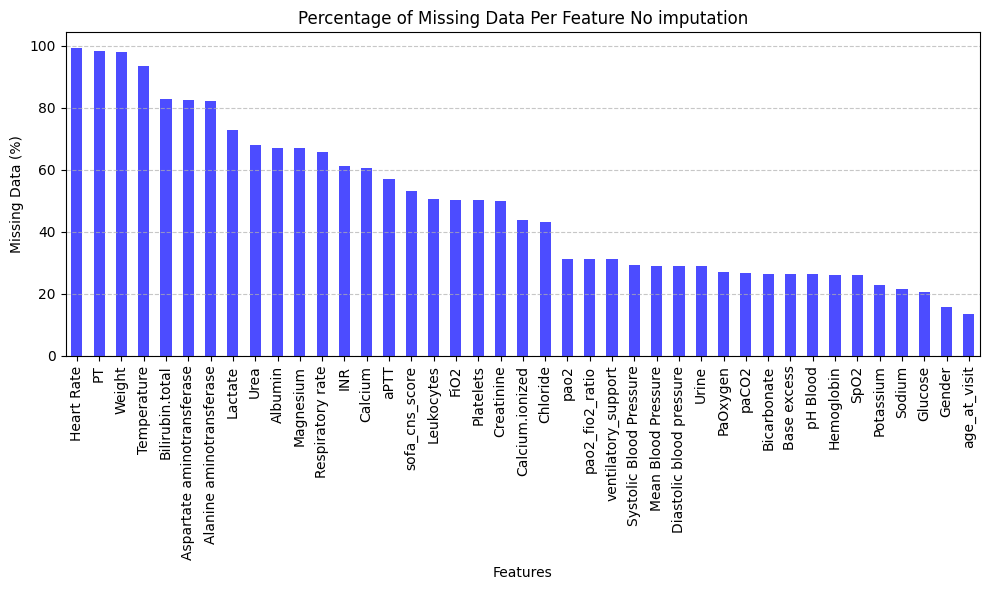

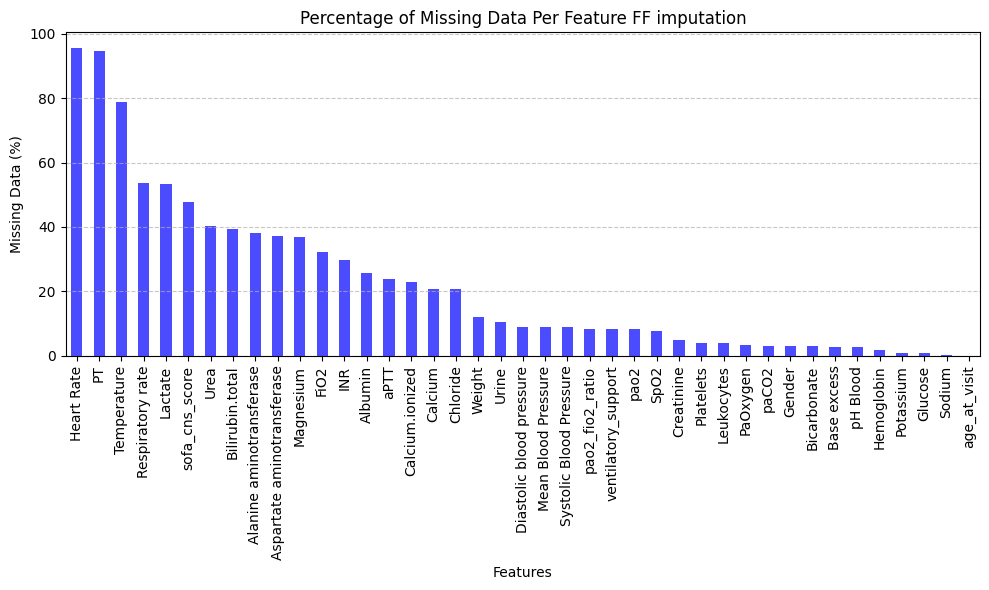

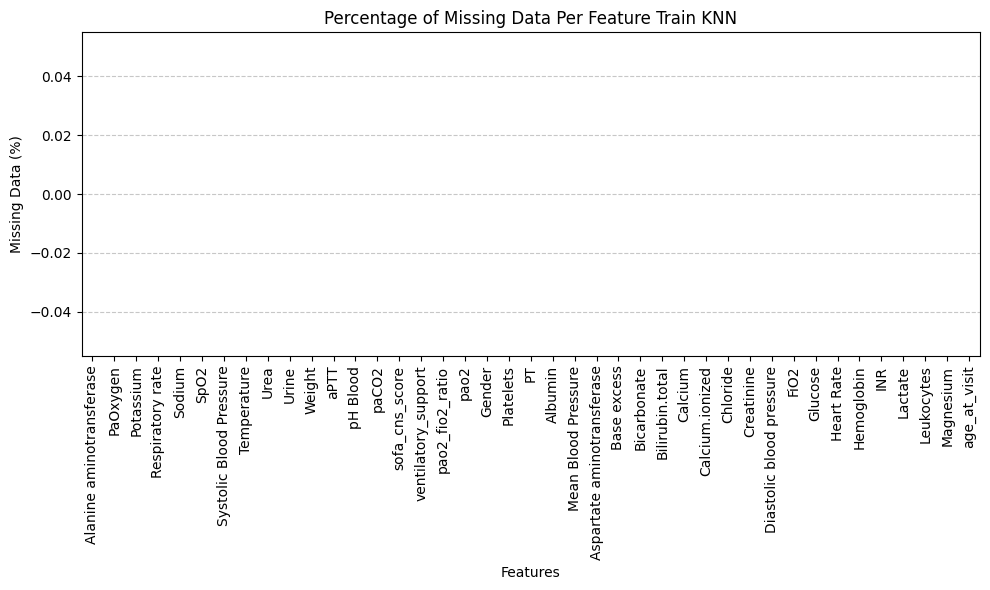

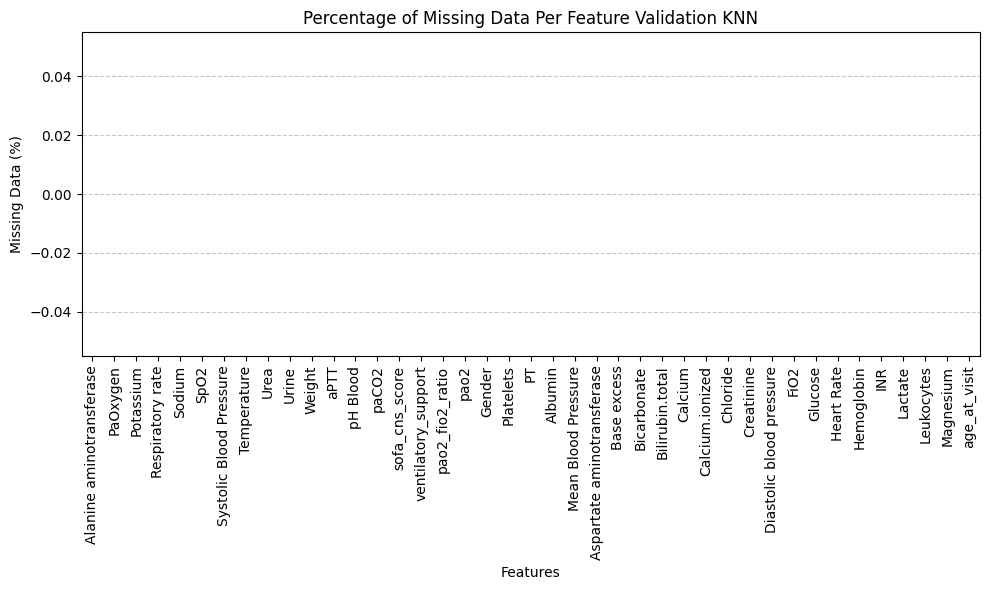

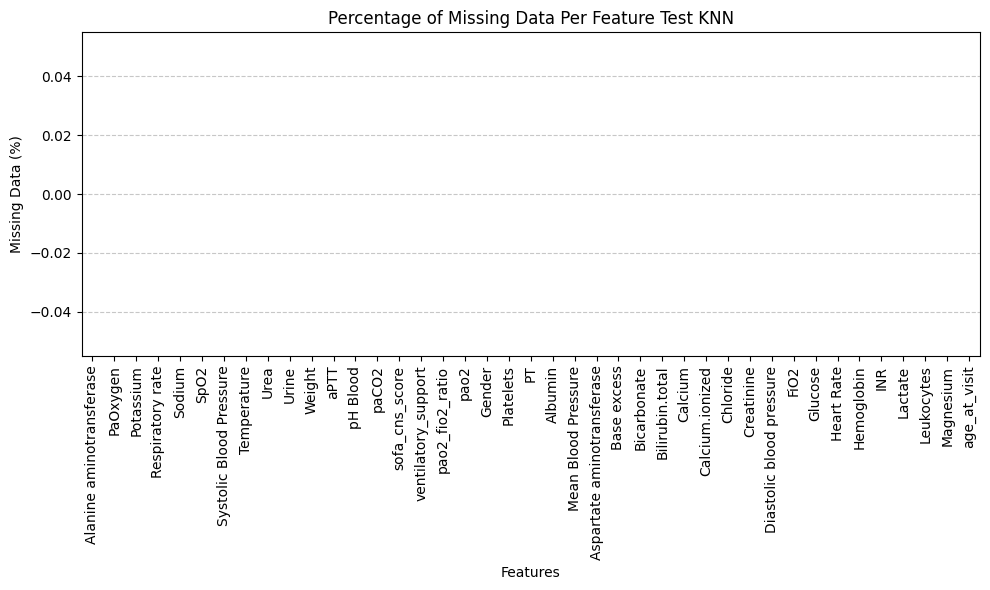

In [9]:

from src.data_processing.process import process_data


df_train, df_val, df_test = process_data(PROJECT_ID, config_gbq, default_path="./MLRFH")

#df_train["pao2"] = (df_train["pao2"] - df_train["pao2"].mean()) / df_train["pao2"].std()
df_train = df_train.reset_index()




In [10]:
df_test = df_test.reset_index()

In [11]:
df_train = df_train.drop(columns=["Bicarbonate"])
df_val = df_val.drop(columns=["Bicarbonate"])
df_test = df_test.drop(columns=["Bicarbonate"])

# Making the Actions (Space)

## Vasopressors and Ionotropes

In [12]:
query = """
WITH filtered_measurement AS (
    SELECT
        visit_occurrence_id,
        value_as_number AS patientweight
    FROM measurement
    WHERE provider_id IS NULL
    AND measurement_concept_id IN (
        3026600, -- Body weight Estimated
        3013762, -- Body weight Measured
        3023166, -- Body weight Stated
        3025315  -- Body weight
    )
),
dosing AS (
    SELECT
        de.person_id,
        de.visit_occurrence_id,
        de.drug_concept_id AS itemid,
        c.concept_name AS item,
        de.drug_exposure_start_datetime AS start_datetime,
        de.drug_exposure_end_datetime AS stop_datetime,
        TIMESTAMP_DIFF(de.drug_exposure_end_datetime, de.drug_exposure_start_datetime, MINUTE) AS duration,
        -- Extract dose and rate from the sig field
        CAST(REGEXP_EXTRACT(de.sig, r'(\\d+\\.?\\d*) mg') AS FLOAT64) AS dose,
        CAST(REGEXP_EXTRACT(de.sig, r'@ (\\d+\\.?\\d*) mg/uur') AS FLOAT64) AS rate,
        'mg/uur' AS rateunit,
        fm.patientweight
    FROM drug_exposure de
    LEFT JOIN visit_occurrence vo ON de.visit_occurrence_id = vo.visit_occurrence_id
    LEFT JOIN concept c ON de.drug_concept_id = c.concept_id
    LEFT JOIN filtered_measurement fm ON de.visit_occurrence_id = fm.visit_occurrence_id
    WHERE c.concept_id IN (
            36411287, -- 50 ML Dopamine 4 MG/ML Injectable Solution
            21088391, -- 50 ML Dobutamine 5 MG/ML Injection
            19076867, -- Epinephrine 0.1 MG/ML Injectable Solution
            2907531  -- 50 ML Norepinephrine 0.2 MG/ML Injection
        )
    AND de.visit_occurrence_id IN {visit_occurrence_ids}
    AND CAST(REGEXP_EXTRACT(de.sig, r'@ (\\d+\\.?\\d*) mg/uur') AS FLOAT64) > 0.1
)
SELECT
    person_id,
    visit_occurrence_id,
    itemid,
    item,
    duration,
    dose,
    rate,
    rateunit,
    start_datetime,
    stop_datetime,
    patientweight,
    CASE
        -- recalculate the dose to µg/kg/min ('gamma')
        WHEN rateunit = 'mg/uur' THEN (rate * 1000) / patientweight / 60 -- convert mg/hour to µg/kg/min
        ELSE NULL -- Placeholder for other conversions if necessary
    END AS gamma
FROM dosing
ORDER BY visit_occurrence_id, start_datetime
"""

sepsis_vasopressors_train = pd.read_gbq(query.format(visit_occurrence_ids=tuple(df_train.reset_index()["visit_occurrence_id"].tolist())), configuration=config_gbq, use_bqstorage_api=True)

#print(sepsis_vasopressors.head())
print(f"Etracted {len(sepsis_vasopressors_train)} records")
print(f"Unique vasopressors {sepsis_vasopressors_train['item'].unique()}")

sepsis_vasopressors_train.head()

sepsis_vasopressors_test = pd.read_gbq(query.format(visit_occurrence_ids=tuple(df_test.reset_index()["visit_occurrence_id"].tolist())), configuration=config_gbq, use_bqstorage_api=True)

#print(sepsis_vasopressors.head())
print(f"Etracted {len(sepsis_vasopressors_test)} records")
print(f"Unique vasopressors {sepsis_vasopressors_test['item'].unique()}")

sepsis_vasopressors_test.head()

<ipython-input-12-f38414240bb0>:63: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  sepsis_vasopressors_train = pd.read_gbq(query.format(visit_occurrence_ids=tuple(df_train.reset_index()["visit_occurrence_id"].tolist())), configuration=config_gbq, use_bqstorage_api=True)


Etracted 44146 records
Unique vasopressors ['50 ML norepinephrine 0.2 MG/ML Injection'
 'epinephrine 0.1 MG/ML Injectable Solution'
 '50 ML Dopamine 4 MG/ML Injectable Solution'
 '50 ML Dobutamine 5 MG/ML Injection']


<ipython-input-12-f38414240bb0>:71: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  sepsis_vasopressors_test = pd.read_gbq(query.format(visit_occurrence_ids=tuple(df_test.reset_index()["visit_occurrence_id"].tolist())), configuration=config_gbq, use_bqstorage_api=True)


Etracted 13946 records
Unique vasopressors ['50 ML Dopamine 4 MG/ML Injectable Solution'
 '50 ML norepinephrine 0.2 MG/ML Injection'
 '50 ML Dobutamine 5 MG/ML Injection'
 'epinephrine 0.1 MG/ML Injectable Solution']


,person_id,visit_occurrence_id,itemid,item,duration,dose,rate,rateunit,start_datetime,stop_datetime,patientweight,gamma
0,36,38,36411287,50 ML Dopamine 4 MG/ML Injectable Solution,30,10.00,20.00,mg/uur,2013-01-01 00:28:00+00:00,2013-01-01 00:58:00+00:00,75.00000000000000000000000000000000000000,4.444444
1,36,38,2907531,50 ML norepinephrine 0.2 MG/ML Injection,177,2.95,1.00,mg/uur,2013-01-01 00:29:00+00:00,2013-01-01 03:26:00+00:00,75.00000000000000000000000000000000000000,0.222222
2,36,38,2907531,50 ML norepinephrine 0.2 MG/ML Injection,18,0.60,2.00,mg/uur,2013-01-01 03:26:00+00:00,2013-01-01 03:44:00+00:00,75.00000000000000000000000000000000000000,0.444444
3,36,38,2907531,50 ML norepinephrine 0.2 MG/ML Injection,90,4.50,3.00,mg/uur,2013-01-01 03:44:00+00:00,2013-01-01 05:14:00+00:00,75.00000000000000000000000000000000000000,0.666667
4,36,38,2907531,50 ML norepinephrine 0.2 MG/ML Injection,60,1.95,1.94,mg/uur,2013-01-01 05:14:00+00:00,2013-01-01 06:14:00+00:00,75.00000000000000000000000000000000000000,0.431111


### Calculating Epinephrine Equivalent Values[[1](https://pmc.ncbi.nlm.nih.gov/articles/PMC3590882/pdf/chest_143_3_664.pdf)] (e-table 2)

| Vasopressor | Norepinephrine Equivalent Dose |
|-|-|
|Epinephrine| 1 |
| Norepinephrin | 1 |
|Dopamin| 0.01|
|Dobutamine**| 0.01 |




** Derived from VIS-score[[1](https://www.sciencedirect.com/science/article/abs/pii/S1053077020310351?fr=RR-1&ref=cra_js_challenge)]

Exact values might differ [[2](https://www.researchgate.net/publication/367302762_An_updated_norepinephrine_equivalent_score_in_intensive_care_as_a_marker_of_shock_severity/fulltext/63cb3720d9fb5967c2f1bafe/An-updated-norepinephrine-equivalent-score-in-intensive-care-as-a-marker-of-shock-severity.pdf?origin=publication_detail&_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6InB1YmxpY2F0aW9uIiwicGFnZSI6InB1YmxpY2F0aW9uRG93bmxvYWQiLCJwcmV2aW91c1BhZ2UiOiJwdWJsaWNhdGlvbiJ9fQ)].

In [13]:
convert_dict = {
    "epinephrine": 1.0,
    "norepinephrine": 1.0,
    "dopamine": 0.01,
    "dobutamine": 0.01,
}


def equalize_dose(row):
    for key in convert_dict.keys():
        if key in row["item"].lower():
            return row["gamma"] * convert_dict[key]
    raise ValueError(f"Unknown vasopressor {row['item']}")


sepsis_vasopressors_train["equiv_gamma"] = sepsis_vasopressors_train.apply(equalize_dose, axis=1)

# drop outliers based in inter quantile range
sepsis_vasopressors_cleaned_train = sepsis_vasopressors_train[sepsis_vasopressors_train["equiv_gamma"] < sepsis_vasopressors_train["equiv_gamma"].quantile(0.99)]
sepsis_vasopressors_cleaned_train = sepsis_vasopressors_cleaned_train.reset_index()

for item in sepsis_vasopressors_cleaned_train["item"].unique():
    print("Mean dose for:", item, sepsis_vasopressors_cleaned_train[sepsis_vasopressors_cleaned_train["item"] == item]["equiv_gamma"].mean())

Mean dose for: 50 ML norepinephrine 0.2 MG/ML Injection 0.30767138801693344
Mean dose for: epinephrine 0.1 MG/ML Injectable Solution 0.4345157138627954
Mean dose for: 50 ML Dopamine 4 MG/ML Injectable Solution 0.05343824384482604
Mean dose for: 50 ML Dobutamine 5 MG/ML Injection 0.048168767754822886


In [14]:
sepsis_vasopressors_test["equiv_gamma"] = sepsis_vasopressors_test.apply(equalize_dose, axis=1)

# drop outliers based in inter quantile range
sepsis_vasopressors_cleaned_test = sepsis_vasopressors_test[sepsis_vasopressors_test["equiv_gamma"] < sepsis_vasopressors_test["equiv_gamma"].quantile(0.99)]
sepsis_vasopressors_cleaned_test = sepsis_vasopressors_cleaned_test.reset_index()

for item in sepsis_vasopressors_cleaned_test["item"].unique():
    print("Mean dose for:", item, sepsis_vasopressors_cleaned_test[sepsis_vasopressors_cleaned_test["item"] == item]["equiv_gamma"].mean())

Mean dose for: 50 ML Dopamine 4 MG/ML Injectable Solution 0.04991065589726104
Mean dose for: 50 ML norepinephrine 0.2 MG/ML Injection 0.32244813155774504
Mean dose for: 50 ML Dobutamine 5 MG/ML Injection 0.04078527895547348
Mean dose for: epinephrine 0.1 MG/ML Injectable Solution 0.4008811430476417


|Dose Range	|Mean|Mode|% of Data
|[0]|?	|?	|?	
|]0-0.08|0.05126128202572898|0.04444444444444444|0.2403460594425138
|]0.08-0.22|0.13925176453070737|0.08888889111111112|0.32892658387810153
|]0.22-0.45|0.317008833118538|0.22222222222222224|0.2232375027339668
|>0.45|0.8095733533157431|0.5128205128205129|0.20748985394541788


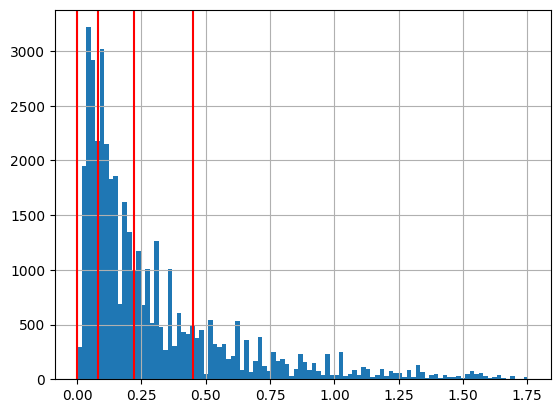

In [15]:
# make histogram of data
sepsis_vasopressors_cleaned_train["equiv_gamma"].hist(bins=100)

bins = [0, 0, 0.08, 0.22, 0.45]


print("|Dose Range\t|Mean|Mode|% of Data")
for i, bin in enumerate(bins):
    if i == 0:
        print(f"|[0]|?\t|?\t|?\t")
        continue
    if i == len(bins) - 1:
        bin_vasopressor = sepsis_vasopressors_cleaned_train[
              sepsis_vasopressors_cleaned_train["equiv_gamma"] > bin
        ]
        print(f"|>{bin}", end="")
    else:
        bin_vasopressor = sepsis_vasopressors_cleaned_train[
            (sepsis_vasopressors_cleaned_train["equiv_gamma"] > bin) & (sepsis_vasopressors_cleaned_train["equiv_gamma"] <= bins[i+1])
        ]
        print(f"|]{bin}-{bins[i+1]}", end="")
    print(f"|{bin_vasopressor['equiv_gamma'].mean()}|{bin_vasopressor['equiv_gamma'].mode().mean()}|{len(bin_vasopressor)/len(sepsis_vasopressors_cleaned_train)}")
    plt.axvline(bin, color="red")



## Fluid Intake

In [16]:
fluid_intake_query = '''
    SELECT m.person_id, m.measurement_concept_id, c.concept_name, measurement_datetime, value_as_number, m.visit_occurrence_id
    FROM measurement as m

    LEFT JOIN concept c ON m.measurement_concept_id = c.concept_id

    WHERE m.visit_occurrence_id IN {visit_occurrence_ids}
    AND m.provider_id IS NULL
    AND (c.concept_id = 3010494 or c.concept_id = 3037253 or c.concept_id = 3037253 or c.concept_id = 3013308)
    GROUP BY m.person_id, m.measurement_concept_id, c.concept_name, measurement_datetime, value_as_number, m.visit_occurrence_id
    '''

In [17]:
sepsis_fluid_train = pd.read_gbq(
    fluid_intake_query.format(visit_occurrence_ids=tuple(df_train.reset_index()["visit_occurrence_id"].tolist())),
    configuration=config_gbq,
    use_bqstorage_api=True)

sepsis_fluid_train["value_as_number"] = sepsis_fluid_train["value_as_number"].astype(float)
sepsis_fluid_cleaned_train = sepsis_fluid_train[sepsis_fluid_train["value_as_number"] < sepsis_fluid_train["value_as_number"].quantile(0.99)]
print(sepsis_fluid_train.columns)
sepsis_fluid_train.head()

<ipython-input-17-86657037092d>:1: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  sepsis_fluid_train = pd.read_gbq(


Index(['person_id', 'measurement_concept_id', 'concept_name',
       'measurement_datetime', 'value_as_number', 'visit_occurrence_id'],
      dtype='object')


,person_id,measurement_concept_id,concept_name,measurement_datetime,value_as_number,visit_occurrence_id
0,448,3013308,Fluid intake Measured,2006-01-09 17:48:00+00:00,0.0,514
1,448,3013308,Fluid intake Measured,2006-01-21 17:48:00+00:00,0.0,514
2,238,3013308,Fluid intake Measured,2013-01-17 15:43:00+00:00,0.0,268
3,242,3013308,Fluid intake Measured,2013-01-11 21:49:00+00:00,0.0,274
4,246,3013308,Fluid intake Measured,2013-03-13 14:02:00+00:00,0.0,278


In [18]:
sepsis_fluid_test = pd.read_gbq(
    fluid_intake_query.format(visit_occurrence_ids=tuple(df_test.reset_index()["visit_occurrence_id"].tolist())),
    configuration=config_gbq,
    use_bqstorage_api=True)

sepsis_fluid_test["value_as_number"] = sepsis_fluid_test["value_as_number"].astype(float)
sepsis_fluid_cleaned_test = sepsis_fluid_test[sepsis_fluid_test["value_as_number"] < sepsis_fluid_test["value_as_number"].quantile(0.99)]
print(sepsis_fluid_test.columns)
sepsis_fluid_test.head()

<ipython-input-18-443437ad9bbc>:1: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  sepsis_fluid_test = pd.read_gbq(


Index(['person_id', 'measurement_concept_id', 'concept_name',
       'measurement_datetime', 'value_as_number', 'visit_occurrence_id'],
      dtype='object')


,person_id,measurement_concept_id,concept_name,measurement_datetime,value_as_number,visit_occurrence_id
0,746,3013308,Fluid intake Measured,2006-01-19 20:32:00+00:00,0.0,859
1,746,3013308,Fluid intake Measured,2006-01-11 02:32:00+00:00,0.0,859
2,166,3013308,Fluid intake Measured,2013-01-08 10:43:00+00:00,0.0,190
3,166,3013308,Fluid intake Measured,2013-01-06 10:43:00+00:00,0.0,190
4,166,3013308,Fluid intake Measured,2013-01-06 00:33:00+00:00,0.0,190


<Axes: >

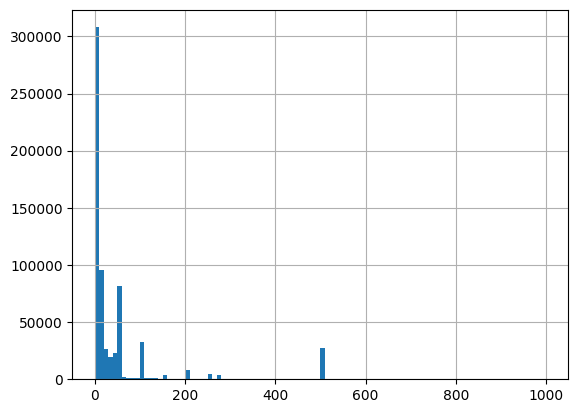

In [19]:
# make histogram for fluids
fluid_ranges = {
    0, 0, 50, 180, 530
}
sepsis_fluid_cleaned_train["value_as_number"].hist(bins=100)


<Axes: >

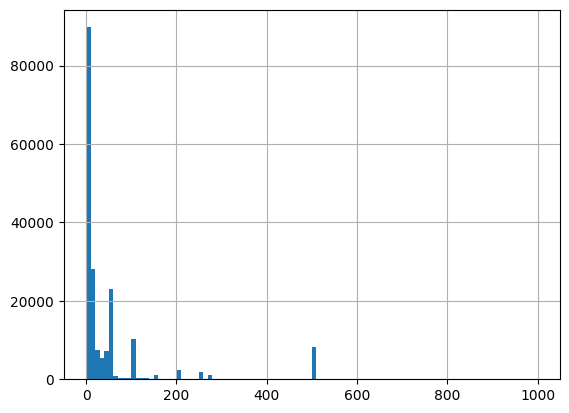

In [20]:
# make histogram for fluids
fluid_ranges = {
    0, 0, 50, 180, 530
}
sepsis_fluid_cleaned_test["value_as_number"].hist(bins=100)

In [21]:
print(df_test.columns)

Index(['visit_occurrence_id', 'measurement_datetime',
       'Alanine aminotransferase', 'Albumin', 'Aspartate aminotransferase',
       'Base excess', 'Bilirubin.total', 'Calcium', 'Calcium.ionized',
       'Chloride', 'Creatinine', 'Diastolic blood pressure', 'FiO2', 'Glucose',
       'Heart Rate', 'Hemoglobin', 'INR', 'Lactate', 'Leukocytes', 'Magnesium',
       'Mean Blood Pressure', 'PT', 'PaOxygen', 'Platelets', 'Potassium',
       'Respiratory rate', 'Sodium', 'SpO2', 'Systolic Blood Pressure',
       'Temperature', 'Urea', 'Urine', 'Weight', 'aPTT', 'pH Blood', 'paCO2',
       'sofa_cns_score', 'ventilatory_support', 'pao2_fio2_ratio', 'pao2',
       'Gender', 'age_at_visit'],
      dtype='object')


In [22]:
import pandas as pd
import numpy as np
from tqdm import tqdm


def calculate_actions(df_sequences, df_vasopressors):
    # Step 2: Apply the function to df2
    tqdm.pandas()
    gamma_sum = df_sequences.progress_apply(lambda row: compute_window_gamma(row, df_vasopressors), axis=1)

    # Calculate average gamma (handle total_hours = 0 case)
    gamma_sum["average_gamma"] = gamma_sum["total_gamma"] / gamma_sum['total_hours']
    gamma_sum['average_gamma'] = gamma_sum['average_gamma'].fillna(0)  # Fill NaN for empty windows
    return gamma_sum["average_gamma"]


def compute_window_gamma(row, df_vasopressors):
    # Filter intervals from df1 that overlap with the current window
    row["window_end"] = row["measurement_datetime"] + pd.Timedelta(hours=12)
    row["window_start"] = row["measurement_datetime"]

    overlapping = df_vasopressors[
        (df_vasopressors['start_datetime'] < row['window_end']) &\
        (df_vasopressors['stop_datetime'] > row['window_start']) &\
        (df_vasopressors["visit_occurrence_id"] == row["visit_occurrence_id"])
    ]

    if overlapping.empty:
        return pd.Series({'total_gamma': 0, 'total_hours': 0})

    # Calculate overlap duration for normalization
    overlapping['overlap_start'] = overlapping["start_datetime"].apply(lambda x: max(x, row["window_start"]))
    overlapping['overlap_end'] = overlapping["stop_datetime"].apply(lambda x: min(x, row["window_end"]))
    overlapping['overlap_duration'] = (overlapping['overlap_end'] - overlapping['overlap_start']).dt.total_seconds() / 3600  # in hours

    # Compute weighted gamma
    overlapping['weighted_gamma'] = overlapping['equiv_gamma'] * overlapping['overlap_duration']

    # Aggregate results for this window
    total_gamma = overlapping['weighted_gamma'].sum()
    total_hours = overlapping['overlap_duration'].sum()
    return pd.Series({'total_gamma': total_gamma, 'total_hours': total_hours})

gamma_avg_train = calculate_actions(df_train[["visit_occurrence_id", "measurement_datetime"]], sepsis_vasopressors_cleaned_train)
gamma_avg_test = calculate_actions(df_test[["visit_occurrence_id", "measurement_datetime"]], sepsis_vasopressors_cleaned_test)

100%|██████████| 8918/8918 [00:41<00:00, 215.26it/s]


average_gamma    0.772508
Name: 0.99, dtype: float64


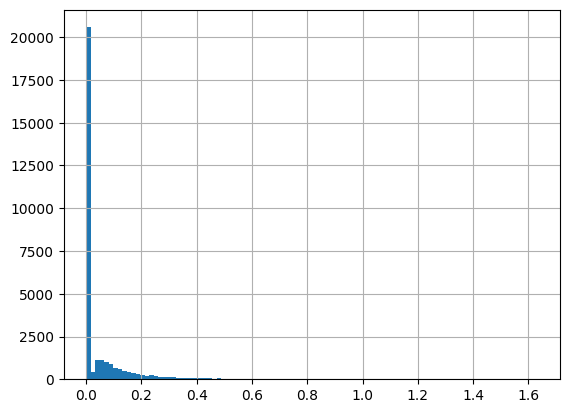

In [23]:
gamma_avg_train.hist(bins=100)
print(pd.DataFrame(gamma_avg_train).quantile(0.99))

In [24]:
def add_windowed_sum_apply(df_windows, df_values, time_column, value_column, start_col, time_frame, output_col):
    """
    Add a column to `df_windows` with the sum of values in `df_values` that fall within the time windows.

    Parameters:
        df_windows (pd.DataFrame): The DataFrame with time windows.
        df_values (pd.DataFrame): The DataFrame with values and their corresponding timestamps.
        time_column (str): The name of the time column in `df_values`.
        value_column (str): The name of the value column in `df_values`.
        start_col (str): The name of the start time column in `df_windows`.
        end_col (str): The name of the end time column in `df_windows`.
        output_col (str): The name of the column to add to `df_windows` for the sum.

    Returns:
        pd.DataFrame: The `df_windows` DataFrame with the added column.
    """
    # Ensure the time columns are datetime
    df_windows["window_end"] = df_windows[start_col] + pd.Timedelta(hours=time_frame)

    # Define a function to calculate the sum for a single window
    def calculate_sum(row):
        start_time, end_time = row[start_col], row["window_end"]
        return df_values[
            (df_values[time_column] >= start_time) &\
            (df_values[time_column] <= end_time) &\
            (df_values["visit_occurrence_id"] == row["visit_occurrence_id"])
        ][value_column].sum()

    # Apply the function row-wise and create a new column
    df_windows[output_col] = df_windows.progress_apply(calculate_sum, axis=1)

    return df_windows[output_col]

#df_train = df_train.reset_index()
sepsis_fluid_cleaned_train["measurement_datetime"] = pd.to_datetime(sepsis_fluid_cleaned_train["measurement_datetime"])
sepsis_fluid_cleaned_train["value_as_number"] = sepsis_fluid_cleaned_train["value_as_number"].astype(float)

df_train["fluid_intake"] = add_windowed_sum_apply(
    df_train,
    sepsis_fluid_cleaned_train,
    "measurement_datetime",
    "value_as_number",
    "measurement_datetime",
    12,
    "fluid_intake_sum"
)

#df_train = df_train.reset_index()
sepsis_fluid_cleaned_test["measurement_datetime"] = pd.to_datetime(sepsis_fluid_cleaned_test["measurement_datetime"])
sepsis_fluid_cleaned_test["value_as_number"] = sepsis_fluid_cleaned_test["value_as_number"].astype(float)

df_test["fluid_intake"] = add_windowed_sum_apply(
    df_test,
    sepsis_fluid_cleaned_test,
    "measurement_datetime",
    "value_as_number",
    "measurement_datetime",
    12,
    "fluid_intake_sum"
)


<ipython-input-24-354dd8d5c791>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sepsis_fluid_cleaned_train["measurement_datetime"] = pd.to_datetime(sepsis_fluid_cleaned_train["measurement_datetime"])
<ipython-input-24-354dd8d5c791>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sepsis_fluid_cleaned_train["value_as_number"] = sepsis_fluid_cleaned_train["value_as_number"].astype(float)
100%|██████████| 30909/30909 [04:44<00:00, 108.47it/s]
<ipython-input-24-354dd8d5c791>:49: SettingWithCopyWarning: 
A va

1157.5349411688771
21052.59998903
2999.339994255998


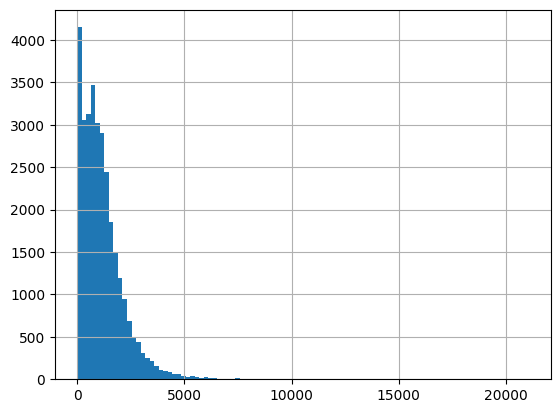

In [25]:
df_train["fluid_intake_sum"].hist(bins=100)
print(df_train["fluid_intake_sum"].mean())
print(df_train["fluid_intake_sum"].max())
print(df_train["fluid_intake_sum"].quantile(0.95))

1217.2502017017246
9742.000006510001
3174.1399907679997


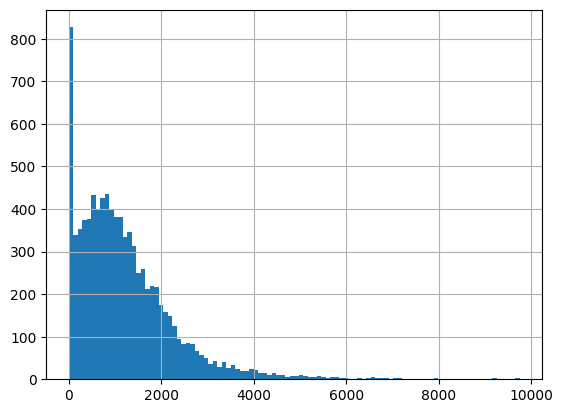

In [26]:
df_test["fluid_intake_sum"].hist(bins=100)
print(df_test["fluid_intake_sum"].mean())
print(df_test["fluid_intake_sum"].max())
print(df_test["fluid_intake_sum"].quantile(0.95))

# Generate

In [27]:
import numpy as np


def calculate_states(fluids, vaosprssors):
    """
    Categorize two NumPy arrays into discrete states and compute unique scores.

    Parameters:
        array1 (numpy.ndarray): The first array.
        array2 (numpy.ndarray): The second array.

    Returns:
        numpy.ndarray: A NumPy array of scores representing unique states (0 to 8).
    """
    # Validate input
    if len(fluids) != len(vaosprssors):
        raise ValueError("Both arrays must have the same length.")
    median_fluids = np.median(fluids[fluids != 0])  # median for non 0 values
    median_vaso = np.median(vaosprssors[vaosprssors != 0])  # median for non 0 values
    # Define categories for array1
    cat_fluids = np.zeros_like(fluids, dtype=int)
    cat_fluids[fluids == 0] = 0
    cat_fluids[(fluids > 0) & (fluids <= median_fluids)] = 1
    cat_fluids[(fluids > median_fluids)] = 2

    # Define categories for array2
    cat_vaso = np.zeros_like(vaosprssors, dtype=int)
    cat_vaso[vaosprssors == 0] = 0
    cat_vaso[(vaosprssors > 0) & (vaosprssors <= median_vaso)] = 1
    cat_vaso[(vaosprssors > median_vaso)] = 2
    #print(cat2)
    print(median_fluids)
    print(median_vaso)

    # Compute unique scores based on the combination of categories
    # Scores  arecomputed as: cat_fluids * 3 + cat_vaso
    scores = cat_fluids * 3 + cat_vaso
    print("Fluids", np.unique(cat_fluids, return_counts=True))
    print("VPs", np.unique(cat_vaso, return_counts=True))
    state_mapping = {
    "vasopressor": ["0", f"(0-{median_fluids:.2f}]", f"> {median_fluids:.2f}"],
    "fluid": ["0", f"(0-{median_vaso:.3f}]", f"> {median_vaso:.3f}"]
    }
    threshold_mapping = {
        "vasopressor": median_vaso,
        "fluid": median_fluids
    }

    return scores, state_mapping, threshold_mapping


def infer_states(fluids, vaosprssors, threshold_mapping):
    """
    Categorize two NumPy arrays into discrete states and compute unique scores.

    Parameters:
        array1 (numpy.ndarray): The first array.
        array2 (numpy.ndarray): The second array.

    Returns:
        numpy.ndarray: A NumPy array of scores representing unique states (0 to 8).
    """
    # Validate input
    if len(fluids) != len(vaosprssors):
        raise ValueError("Both arrays must have the same length.")
    median_fluids = threshold_mapping["fluid"]
    median_vaso = threshold_mapping["vasopressor"]
    # Define categories for array1
    cat_fluids = np.zeros_like(fluids, dtype=int)
    cat_fluids[fluids == 0] = 0
    cat_fluids[(fluids > 0) & (fluids <= median_fluids)] = 1
    cat_fluids[(fluids > median_fluids)] = 2

    # Define categories for array2
    cat_vaso = np.zeros_like(vaosprssors, dtype=int)
    cat_vaso[vaosprssors == 0] = 0
    cat_vaso[(vaosprssors > 0) & (vaosprssors <= median_vaso)] = 1
    cat_vaso[(vaosprssors > median_vaso)] = 2
    #print(cat2)
    print(median_fluids)
    print(median_vaso)

    # Compute unique scores based on the combination of categories
    # Scores  arecomputed as: cat_fluids * 3 + cat_vaso
    scores = cat_fluids * 3 + cat_vaso
    print("Fluids", np.unique(cat_fluids, return_counts=True))
    print("VPs", np.unique(cat_vaso, return_counts=True))


    return scores





df_train["action"], state_mapping, threshold_mapping = calculate_states(df_train["fluid_intake_sum"].values, gamma_avg_train.values)
df_test["action"] = infer_states(df_test["fluid_intake_sum"].values, gamma_avg_test.values, threshold_mapping)
print(df_train["action"].unique())
print(df_test["action"].unique())
print(state_mapping)

1028.3999897099998
0.11174761391448733
Fluids (array([0, 1, 2]), array([ 2122, 14394, 14393]))
VPs (array([0, 1, 2]), array([20546,  5182,  5181]))
1028.3999897099998
0.11174761391448733
Fluids (array([0, 1, 2]), array([ 634, 3953, 4331]))
VPs (array([0, 1, 2]), array([5763, 1513, 1642]))
[0 8 6 7 3 5 4]
[0 8 3 6 5 4 7 1]
{'vasopressor': ['0', '(0-1028.40]', '> 1028.40'], 'fluid': ['0', '(0-0.112]', '> 0.112']}


[0 8 6 7 3 5 4]


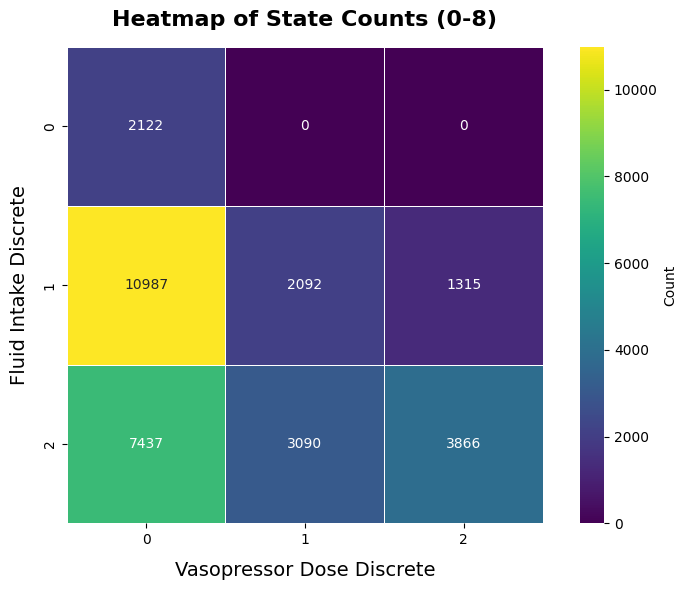

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmap(scores):
    """
    Plot a 3x3 heatmap where each cell is colored by the count of scores (0-8).

    Parameters:
        scores (numpy.ndarray): Array of scores in the range [0, 8].

    Returns:
        None
    """
    # Ensure scores are within the valid range [0, 8]
    if not np.all((0 <= scores) & (scores <= 8)):
        raise ValueError("Scores must be in the range [0, 8].")

    # Count occurrences for each score
    counts = np.bincount(scores, minlength=9)

    # Reshape counts into a 3x3 matrix
    heatmap_matrix = counts.reshape(3, 3)

    # Create the heatmap using Seaborn
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(
        heatmap_matrix,
        annot=True,                # Annotate with count values
        fmt="d",                   # Integer format for annotations
        cmap="viridis",            # Color map
        cbar_kws={"label": "Count"},  # Colorbar label
        linewidths=0.5,            # Add gridlines for clarity
        linecolor="white",         # Gridline color
        square=True                # Ensure square cells
    )

    # Add labels and title
    ax.set_title("Heatmap of State Counts (0-8)", fontsize=16, fontweight="bold", pad=15)
    ax.set_xlabel("Vasopressor Dose Discrete", fontsize=14, labelpad=10)
    ax.set_ylabel("Fluid Intake Discrete", fontsize=14, labelpad=10)
    ax.set_xticks([0.5, 1.5, 2.5], ["0", "1", "2"])
    ax.set_yticks([0.5, 1.5, 2.5], ["0", "1", "2"])

    # Adjust plot layout
    plt.tight_layout()
    plt.show()

# Example usage
print(df_train["action"].unique())
plot_heatmap(df_train["action"].values)


# Outcome Data - In hospital Mortality

In [29]:
sepsis_death_query = '''
    SELECT
        vo.person_id,
        vo.visit_occurrence_id,
        d.death_datetime,
        vo.visit_start_datetime,
        vo.visit_end_datetime,
        ABS(TIMESTAMP_DIFF(vo.visit_start_datetime, d.death_datetime, DAY)) AS in_hospital_survived
    from visit_occurrence AS vo
    LEFT JOIN death AS d
        ON vo.person_id = d.person_id
    WHERE vo.visit_occurrence_id IN {visit_occurrence_ids}
    GROUP BY vo.person_id, vo.visit_occurrence_id, d.death_datetime, vo.visit_start_datetime, vo.visit_end_datetime
    '''

<ipython-input-30-5ba5ee70da92>:2: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  sepsis_death_train = pd.read_gbq(


234 persons died of sepsis in the hospital
558 persons survived ICU


<Axes: >

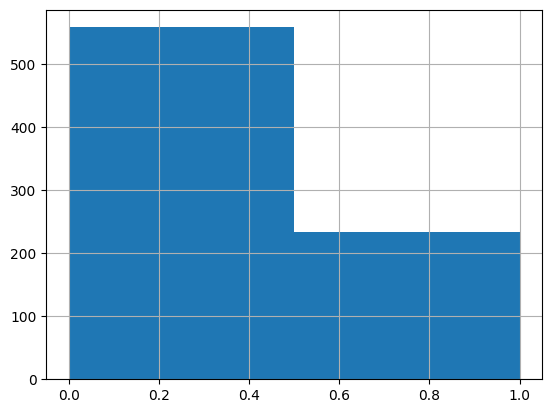

In [30]:
#df_train = df_train.reset_index()
sepsis_death_train = pd.read_gbq(
    sepsis_death_query.format(visit_occurrence_ids=tuple(df_train["visit_occurrence_id"].tolist())),
    configuration=config_gbq,
    use_bqstorage_api=True
)
# Ensure the columns are datetime objects
sepsis_death_train['death_datetime'] = pd.to_datetime(sepsis_death_train['death_datetime'])
sepsis_death_train['visit_end_datetime'] = pd.to_datetime(sepsis_death_train['visit_end_datetime'])
sepsis_death_train['visit_start_datetime'] = pd.to_datetime(sepsis_death_train['visit_start_datetime'])

# Set 'in_hospital_survived' to NaN where death_datetime is after visit_end_datetime
sepsis_death_train.loc[:,'died_in_hospital'] = 0
sepsis_death_train.loc[
    (sepsis_death_train['death_datetime'] <= sepsis_death_train['visit_end_datetime']) &\
    (sepsis_death_train['death_datetime'] >= sepsis_death_train['visit_start_datetime']),
    'died_in_hospital'
] = 1
sepsis_death_train['died_in_hospital'] = sepsis_death_train['died_in_hospital'].fillna(0).astype(int)

sepsis_death_filtered_train = sepsis_death_train.merge(
    df_train[["visit_occurrence_id"]],
    on="visit_occurrence_id",
    how="inner"
)

sepsis_death_filtered_train = sepsis_death_filtered_train.groupby(by=['visit_occurrence_id']).first().reset_index()

print((sepsis_death_filtered_train["died_in_hospital"]==1).sum(), "persons died of sepsis in the hospital")
print((sepsis_death_filtered_train["died_in_hospital"]==0).sum(), "persons survived ICU")

sepsis_death_filtered_train["died_in_hospital"].hist(bins=2)


<ipython-input-31-3b2289088e92>:2: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  sepsis_death_test = pd.read_gbq(


86 persons died of sepsis in the hospital
179 persons survived ICU


<Axes: >

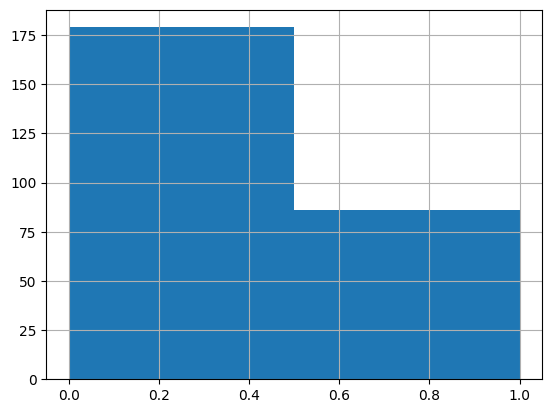

In [31]:
#df_train = df_train.reset_index()
sepsis_death_test = pd.read_gbq(
    sepsis_death_query.format(visit_occurrence_ids=tuple(df_test["visit_occurrence_id"].tolist())),
    configuration=config_gbq,
    use_bqstorage_api=True
)
# Ensure the columns are datetime objects
sepsis_death_test['death_datetime'] = pd.to_datetime(sepsis_death_test['death_datetime'])
sepsis_death_test['visit_end_datetime'] = pd.to_datetime(sepsis_death_test['visit_end_datetime'])
sepsis_death_test['visit_start_datetime'] = pd.to_datetime(sepsis_death_test['visit_start_datetime'])

# Set 'in_hospital_survived' to NaN where death_datetime is after visit_end_datetime
sepsis_death_test.loc[:,'died_in_hospital'] = 0
sepsis_death_test.loc[
    (sepsis_death_test['death_datetime'] <= sepsis_death_test['visit_end_datetime']) &\
    (sepsis_death_test['death_datetime'] >= sepsis_death_test['visit_start_datetime']),
    'died_in_hospital'
] = 1
sepsis_death_test['died_in_hospital'] = sepsis_death_test['died_in_hospital'].fillna(0).astype(int)

sepsis_death_filtered_test = sepsis_death_test.merge(
    df_test[["visit_occurrence_id"]],
    on="visit_occurrence_id",
    how="inner"
)

sepsis_death_filtered_test = sepsis_death_filtered_test.groupby(by=['visit_occurrence_id']).first().reset_index()

print((sepsis_death_filtered_test["died_in_hospital"]==1).sum(), "persons died of sepsis in the hospital")
print((sepsis_death_filtered_test["died_in_hospital"]==0).sum(), "persons survived ICU")

sepsis_death_filtered_test["died_in_hospital"].hist(bins=2)

<ipython-input-32-2f9bc7b146da>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


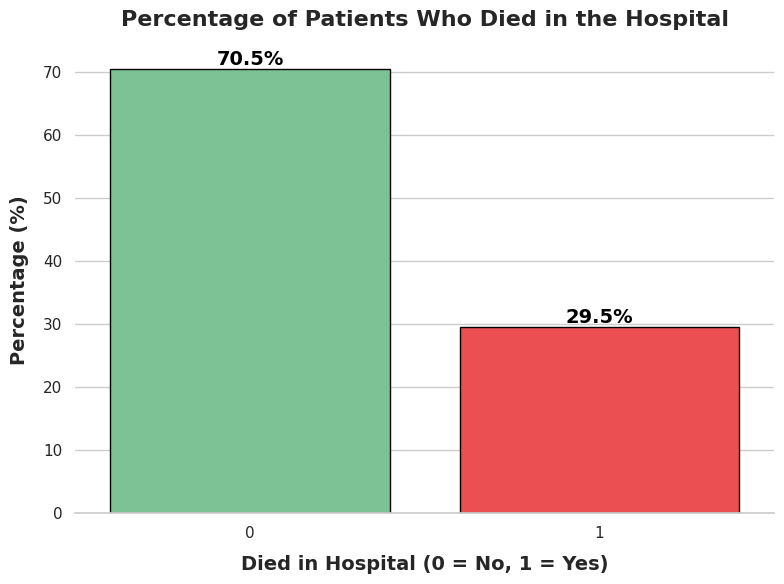

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage distribution
counts = sepsis_death_filtered_train["died_in_hospital"].value_counts(normalize=True) * 100

# Create a DataFrame for seaborn
plot_data = counts.reset_index()
plot_data.columns = ["Died in Hospital", "Percentage"]

# Create the Seaborn barplot
sns.set_theme(style="whitegrid")  # Set Seaborn theme
fig, ax = plt.subplots(figsize=(8, 6))
palette = ["#76c893", "#f94144"]  # Custom colors for 'No' and 'Yes'

sns.barplot(
    x="Died in Hospital", y="Percentage", data=plot_data,
    palette=palette, ax=ax, saturation=0.85, edgecolor="black"
)

# Customize the plot
ax.set_title("Percentage of Patients Who Died in the Hospital", fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("Died in Hospital (0 = No, 1 = Yes)", fontsize=14, fontweight="bold", labelpad=10)
ax.set_ylabel("Percentage (%)", fontsize=14, fontweight="bold", labelpad=10)

# Annotate the bars with percentages
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=14, fontweight="bold", color="black")

# Remove unnecessary spines
sns.despine(left=True, bottom=False)

# Show the plot
plt.tight_layout()
plt.show()


In [33]:
df_train.columns
df_train = df_train.drop(columns=["died_in_hospital", "died_in_hospital_x", "died_in_hospital_y"])

KeyError: "['died_in_hospital', 'died_in_hospital_x', 'died_in_hospital_y'] not found in axis"

In [34]:
# Making the binary in-hospital death
print(len(df_train))
df_train = df_train.merge(
    sepsis_death_filtered_train[["visit_occurrence_id", "died_in_hospital"]],
    on="visit_occurrence_id",
    how="left"
)
print(len(df_train))
print(df_train["died_in_hospital"].unique())
df_train["died_in_hospital"] = df_train["died_in_hospital"].fillna(0).astype(int)

30909
30909
[1 0]


In [35]:
# Making the binary in-hospital death
print(len(df_test))
df_test = df_test.merge(
    sepsis_death_filtered_test[["visit_occurrence_id", "died_in_hospital"]],
    on="visit_occurrence_id",
    how="left"
)
print(len(df_test))
print(df_test["died_in_hospital"].unique())
df_test["died_in_hospital"] = df_test["died_in_hospital"].fillna(0).astype(int)

8918
8918
[1 0]


       visit_occurrence_id  seq_id  died_in_hospital
0                       11       1                 1
1                       11       2                 1
2                       11       3                 1
3                       11       4                 1
4                       37       1                 0
...                    ...     ...               ...
30904                23540       2                 0
30905                23540       3                 0
30906                23540       4                 0
30907                23540       5                 0
30908                23540       6                 0

[30909 rows x 3 columns]
[   0 -100  100]
reward
 0      30117
 100      558
-100      234
Name: count, dtype: int64


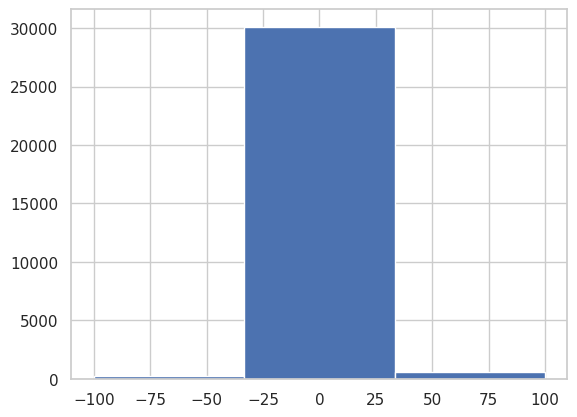

In [36]:
df_train["reward"] = 0
df_train = df_train.sort_values(by=["visit_occurrence_id", "measurement_datetime"])
# Add sequence_id within each visit_occurrence_id
df_train["seq_id"] = df_train.groupby("visit_occurrence_id").cumcount() + 1
# Find the row index for the maximum sequence_id for each visit_occurrence_id
max_sequence_indices = df_train.groupby("visit_occurrence_id")["seq_id"].idxmax()
print(df_train[["visit_occurrence_id", "seq_id", "died_in_hospital"]])

# Set reward to 100 or -100 based on died_in_hospital flag
df_train.loc[max_sequence_indices, "reward"] = df_train.loc[max_sequence_indices, "died_in_hospital"].apply(
    lambda x: 100 if x == 0.0 else -100
)

df_train["reward"].hist(bins=3)
print(df_train["reward"].unique())
print(df_train["reward"].value_counts())

      visit_occurrence_id  seq_id  died_in_hospital
0                      38       1                 1
1                      38       2                 1
2                      38       3                 1
3                      38       4                 1
4                      38       5                 1
...                   ...     ...               ...
8913                23372       2                 0
8914                23372       3                 0
8915                23461       1                 0
8916                23461       2                 0
8917                23461       3                 0

[8918 rows x 3 columns]
[   0 -100  100]
reward
 0      8653
 100     179
-100      86
Name: count, dtype: int64


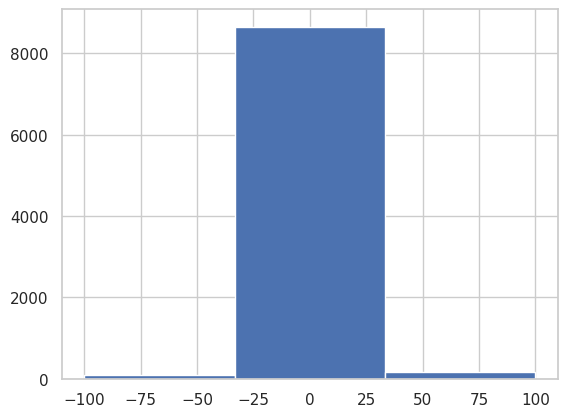

In [37]:
df_test["reward"] = 0
df_test = df_test.sort_values(by=["visit_occurrence_id", "measurement_datetime"])
# Add sequence_id within each visit_occurrence_id
df_test["seq_id"] = df_test.groupby("visit_occurrence_id").cumcount() + 1
# Find the row index for the maximum sequence_id for each visit_occurrence_id
max_sequence_indices = df_test.groupby("visit_occurrence_id")["seq_id"].idxmax()
print(df_test[["visit_occurrence_id", "seq_id", "died_in_hospital"]])

# Set reward to 100 or -100 based on died_in_hospital flag
df_test.loc[max_sequence_indices, "reward"] = df_test.loc[max_sequence_indices, "died_in_hospital"].apply(
    lambda x: 100 if x == 0.0 else -100
)

df_test["reward"].hist(bins=3)
print(df_test["reward"].unique())
print(df_test["reward"].value_counts())

# Obtaining States

In [38]:
# Clustering
from src.clustering import cluster_kmpp
# chose numeric columns
print(df_train.columns)
df_train_clust = df_train[['Alanine aminotransferase', 'Albumin', 'Aspartate aminotransferase',
       'Base excess', 'Bilirubin.total', 'Calcium',
       'Calcium.ionized', 'Chloride', 'Creatinine', 'Diastolic blood pressure',
       'FiO2', 'Glucose', 'Heart Rate', 'Hemoglobin', 'INR', 'Lactate',
       'Leukocytes', 'Magnesium', 'Mean Blood Pressure', 'PT', 'PaOxygen',
       'Platelets', 'Potassium', 'Respiratory rate', 'Sodium', 'SpO2',
       'Systolic Blood Pressure', 'Temperature', 'Urea', 'Urine', 'Weight',
       'aPTT', 'pH Blood', 'paCO2', 'sofa_cns_score', 'ventilatory_support',
       'pao2_fio2_ratio', 'pao2', 'Gender', 'age_at_visit']]
df_test_clust = df_test[['Alanine aminotransferase', 'Albumin', 'Aspartate aminotransferase',
       'Base excess', 'Bilirubin.total', 'Calcium',
       'Calcium.ionized', 'Chloride', 'Creatinine', 'Diastolic blood pressure',
       'FiO2', 'Glucose', 'Heart Rate', 'Hemoglobin', 'INR', 'Lactate',
       'Leukocytes', 'Magnesium', 'Mean Blood Pressure', 'PT', 'PaOxygen',
       'Platelets', 'Potassium', 'Respiratory rate', 'Sodium', 'SpO2',
       'Systolic Blood Pressure', 'Temperature', 'Urea', 'Urine', 'Weight',
       'aPTT', 'pH Blood', 'paCO2', 'sofa_cns_score', 'ventilatory_support',
       'pao2_fio2_ratio', 'pao2', 'Gender', 'age_at_visit']]

kmeans, cluster_centers = cluster_kmpp(df_train_clust, k=400)
df_train["state"] = kmeans.predict(df_train_clust)
df_test["state"] = kmeans.predict(df_test_clust)

Index(['visit_occurrence_id', 'measurement_datetime',
       'Alanine aminotransferase', 'Albumin', 'Aspartate aminotransferase',
       'Base excess', 'Bilirubin.total', 'Calcium', 'Calcium.ionized',
       'Chloride', 'Creatinine', 'Diastolic blood pressure', 'FiO2', 'Glucose',
       'Heart Rate', 'Hemoglobin', 'INR', 'Lactate', 'Leukocytes', 'Magnesium',
       'Mean Blood Pressure', 'PT', 'PaOxygen', 'Platelets', 'Potassium',
       'Respiratory rate', 'Sodium', 'SpO2', 'Systolic Blood Pressure',
       'Temperature', 'Urea', 'Urine', 'Weight', 'aPTT', 'pH Blood', 'paCO2',
       'sofa_cns_score', 'ventilatory_support', 'pao2_fio2_ratio', 'pao2',
       'Gender', 'age_at_visit', 'window_end', 'fluid_intake_sum',
       'fluid_intake', 'action', 'died_in_hospital', 'reward', 'seq_id'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [39]:
df_train.describe()

,visit_occurrence_id,Alanine aminotransferase,Albumin,Aspartate aminotransferase,Base excess,Bilirubin.total,Calcium,Calcium.ionized,Chloride,Creatinine,...,pao2,Gender,age_at_visit,fluid_intake_sum,fluid_intake,action,died_in_hospital,reward,seq_id,state
count,30909.0,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,...,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000
mean,11596.781132,0.033876,0.038138,-0.044260,0.020922,-0.031331,0.012446,0.066729,0.009298,-0.004896,...,-0.016493,0.627940,0.002204,1157.534941,1157.534941,4.693908,0.323369,1.048238,45.672943,189.646737
std,6694.671933,0.902256,0.931768,0.918026,0.990415,0.924543,0.937543,0.947619,0.959854,1.004620,...,1.001227,0.483362,0.968007,1009.834654,1009.834654,2.208735,0.467770,15.973275,55.267658,113.267849
min,11.0,-3.555820,-3.194652,-3.421844,-2.608502,-2.957532,-2.866665,-2.532082,-3.814171,-6.317577,...,-9.321066,0.000000,-1.871053,0.000000,0.000000,0.000000,0.000000,-100.000000,1.000000,0.000000
25%,6073.0,-0.576900,-0.650158,-0.672236,-0.630899,-0.737415,-0.555766,-0.471009,-0.686396,-0.732004,...,-0.648076,0.000000,-0.734164,457.699999,457.699999,3.000000,0.000000,0.000000,12.000000,91.000000
50%,11694.0,0.013705,0.040790,-0.061442,0.040970,-0.042903,-0.008572,0.116342,-0.018038,-0.062532,...,-0.078926,1.000000,-0.048509,954.100002,954.100002,5.000000,0.000000,0.000000,29.000000,186.000000
75%,17243.0,0.649791,0.684286,0.588144,0.675419,0.596270,0.555628,0.609985,0.706686,0.719178,...,0.580887,1.000000,0.777183,1584.699990,1584.699990,6.000000,1.000000,0.000000,59.000000,282.000000
max,23540.0,2.099118,2.409345,2.125376,3.220502,2.027651,2.680516,3.024165,2.360146,2.114405,...,19.154987,1.000000,2.288061,21052.599989,21052.599989,8.000000,1.000000,100.000000,471.000000,399.000000


In [40]:
df_train_clust.describe()

,Alanine aminotransferase,Albumin,Aspartate aminotransferase,Base excess,Bilirubin.total,Calcium,Calcium.ionized,Chloride,Creatinine,Diastolic blood pressure,...,Weight,aPTT,pH Blood,paCO2,sofa_cns_score,ventilatory_support,pao2_fio2_ratio,pao2,Gender,age_at_visit
count,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,...,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000,30909.000000
mean,0.033876,0.038138,-0.044260,0.020922,-0.031331,0.012446,0.066729,0.009298,-0.004896,-0.039245,...,0.032500,-0.227153,-0.009455,0.049928,0.047589,0.703161,0.051988,-0.016493,0.627940,0.002204
std,0.902256,0.931768,0.918026,0.990415,0.924543,0.937543,0.947619,0.959854,1.004620,1.006043,...,0.987611,0.913909,0.996778,1.002652,0.826314,0.456872,0.990059,1.001227,0.483362,0.968007
min,-3.555820,-3.194652,-3.421844,-2.608502,-2.957532,-2.866665,-2.532082,-3.814171,-6.317577,-4.000072,...,-1.759215,-9.981107,-2.440431,-4.131652,-1.159455,0.000000,-1.971975,-9.321066,0.000000,-1.871053
25%,-0.576900,-0.650158,-0.672236,-0.630899,-0.737415,-0.555766,-0.471009,-0.686396,-0.732004,-0.705551,...,-0.892719,-0.894722,-0.719359,-0.619388,-0.755075,0.000000,-0.705450,-0.648076,0.000000,-0.734164
50%,0.013705,0.040790,-0.061442,0.040970,-0.042903,-0.008572,0.116342,-0.018038,-0.062532,-0.047595,...,-0.159328,-0.373147,0.030574,0.005783,0.458065,1.000000,-0.463287,-0.078926,1.000000,-0.048509
75%,0.649791,0.684286,0.588144,0.675419,0.596270,0.555628,0.609985,0.706686,0.719178,0.622357,...,0.475314,0.394193,0.698802,0.710810,0.862445,1.000000,1.417367,0.580887,1.000000,0.777183
max,2.099118,2.409345,2.125376,3.220502,2.027651,2.680516,3.024165,2.360146,2.114405,2.846380,...,1.981400,2.349588,4.035155,2.552950,0.862445,1.000000,1.595036,19.154987,1.000000,2.288061


<ipython-input-41-7953ad875762>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap("tab10", len(unique_clusters))


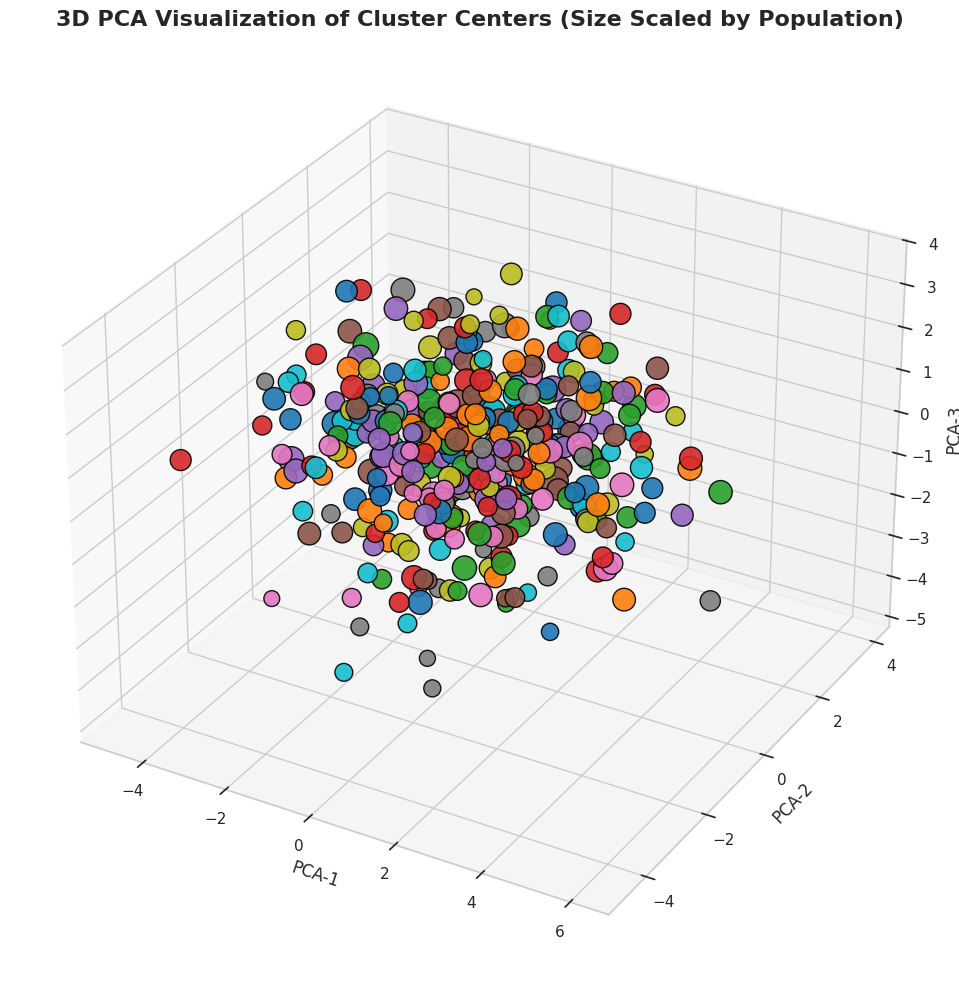

In [41]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data (replace with your clustered data)
data = df_train_clust.copy().values  # Replace with your data
cluster_labels = df_train["state"].values  # Replace with your cluster labels

# Calculate cluster centers and sizes
unique_clusters = np.unique(cluster_labels)
cluster_centers = np.array([data[cluster_labels == cluster].mean(axis=0) for cluster in unique_clusters])
cluster_sizes = np.array([np.sum(cluster_labels == cluster) for cluster in unique_clusters])  # Cluster population

# Apply PCA to reduce cluster centers to 3D
pca = PCA(n_components=3)
pca_results = pca.fit_transform(cluster_centers)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(pca_results, columns=["PCA-1", "PCA-2", "PCA-3"])
pca_df["Cluster"] = unique_clusters
pca_df["Size"] = cluster_sizes

# Generate a color palette for distinct colors
color_palette = plt.cm.get_cmap("tab10", len(unique_clusters))
colors = [color_palette(cluster) for cluster in unique_clusters]

# Normalize cluster sizes for plotting
marker_sizes = (pca_df["Size"] / pca_df["Size"].max()) * 300 + 100  # Scale marker sizes

# 3D Plot using Matplotlib
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for cluster centers
scatter = ax.scatter(
    pca_df["PCA-1"], pca_df["PCA-2"], pca_df["PCA-3"],
    c=colors, s=marker_sizes, alpha=0.9, edgecolor="black"
)

# Add labels and title
ax.set_title("3D PCA Visualization of Cluster Centers (Size Scaled by Population)", fontsize=16, fontweight="bold")
ax.set_xlabel("PCA-1", fontsize=12)
ax.set_ylabel("PCA-2", fontsize=12)
ax.set_zlabel("PCA-3", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [45]:
del data

NameError: name 'data' is not defined

In [43]:
df_train[["state", "action", "reward", "seq_id"]].head(50)

,state,action,reward,seq_id
0,207,0,0,1
1,196,8,0,2
2,196,8,0,3
3,196,8,-100,4
4,279,0,0,1
5,103,6,0,2
6,103,8,0,3
7,103,8,0,4
8,103,7,0,5
9,45,6,0,6


In [44]:
df_test[["state", "action", "reward", "seq_id"]].head(50)

,state,action,reward,seq_id
0,228,0,0,1
1,285,8,0,2
2,153,8,0,3
3,220,8,0,4
4,71,8,0,5
5,285,8,0,6
6,285,8,0,7
7,303,3,0,8
8,303,3,0,9
9,303,6,0,10


# Transform df for training

In [46]:
import pandas as pd

# Example DataFrame
df_test_rl = df_test[['state','action','reward','seq_id','visit_occurrence_id']]

# Initialize an empty list to store trajectory data
trajectory_data = []

# Group by 'id' to handle each trajectory independently
for _, group in df_test_rl.groupby('visit_occurrence_id'):
    group = group.sort_values('seq_id')  # Ensure the sequence is sorted
    states = group['state'].tolist()
    actions = group['action'].tolist()
    rewards = group['reward'].tolist()

    # Create next_state by shifting 'state' column
    next_states = states[1:] + [-1]  # Last next_state is None

    # Create done flag (1 for the last step, 0 otherwise)
    done_flags = [0] * (len(states) - 1) + [1]

    # Build the trajectory data
    for i in range(len(states)):
        trajectory_data.append({
            'state': states[i],
            'action': actions[i],
            'reward': rewards[i],
            'next_state': next_states[i],
            'done': done_flags[i]
        })

# Convert trajectory data to a DataFrame
trajectory_data = pd.DataFrame(trajectory_data)

# Display the result
print(trajectory_data)
print(trajectory_data.dtypes)


      state  action  reward  next_state  done
0       228       0       0         285     0
1       285       8       0         153     0
2       153       8       0         220     0
3       220       8       0          71     0
4        71       8       0         285     0
...     ...     ...     ...         ...   ...
8913    207       6       0         396     0
8914    396       3     100          -1     1
8915     13       0       0         321     0
8916    321       7       0         335     0
8917    335       3     100          -1     1

[8918 rows x 5 columns]
state         int64
action        int64
reward        int64
next_state    int64
done          int64
dtype: object


In [47]:
import numpy as np
import pandas as pd

class QLearningAgent:
    def __init__(self, state_space_size, action_space_size, learning_rate=0.1, discount_factor=0.99):
        """
        Initialize the Q-learning agent.

        Parameters:
        - state_space_size: Number of states (discretized features).
        - action_space_size: Number of discrete actions.
        - learning_rate: Step size for updating Q-values.
        - discount_factor: Discount factor for future rewards.
        """
        self.state_space_size = state_space_size
        self.action_space_size = action_space_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.q_table = np.zeros((state_space_size, action_space_size), dtype=np.float64)  # Initialize Q-table

    def update_batch(self, states, actions, rewards, next_states):
        """
        Update the Q-table using a batch of transitions, considering terminal states represented as -1.

        Parameters:
        - states: Array of current states.
        - actions: Array of actions taken.
        - rewards: Array of observed rewards.
        - next_states: Array of resulting next states, with -1 for terminal states.
        """
        td_targets = rewards.copy()

        # Mask for non-terminal states
        non_terminal_mask = next_states != -1

        # For non-terminal states, include the discounted future rewards
        if np.any(non_terminal_mask):
            next_states_non_terminal = next_states[non_terminal_mask].astype(int)  # Convert valid states to int
            best_next_actions = np.argmax(self.q_table[next_states_non_terminal], axis=1)
            td_targets[non_terminal_mask] += (
                self.discount_factor * self.q_table[next_states_non_terminal, best_next_actions]
            )

        # Ensure td_targets dtype matches q_table dtype
        td_targets = td_targets.astype(self.q_table.dtype)

        # Update Q-values
        for i in range(len(states)):
            td_error = td_targets[i] - self.q_table[states[i], actions[i]]
            self.q_table[states[i], actions[i]] += self.learning_rate * td_error

# Define state and action space sizes
state_space_size = trajectory_data['state'].max() + 1
action_space_size = trajectory_data['action'].max() + 1

# Initialize Q-learning agent
agent = QLearningAgent(state_space_size, action_space_size)

# Training with batch processing
batch_size = 2
for i in range(0, len(trajectory_data), batch_size):
    # Extract batch
    batch = trajectory_data.iloc[i:i + batch_size]
    states = batch['state'].values
    actions = batch['action'].values
    rewards = batch['reward'].astype(float).values
    next_states = batch['next_state'].values

    # Update Q-table using the batch
    agent.update_batch(states, actions, rewards, next_states)

# Print the trained Q-table
print("Trained Q-Table:")
print(agent.q_table)


Trained Q-Table:
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  1.46990513  0.50899177
   0.19409448]
 [ 1.94693261  0.          0.         ... 13.64543389  0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.02078437
   0.        ]
 [ 1.63324219  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


[7.09800404e-02 1.12132765e-04 0.00000000e+00 3.45144651e-01
 6.24579502e-02 3.56582193e-02 2.30096434e-01 1.07086791e-01
 1.48463781e-01]
[[7.09800404e-02 1.12132765e-04 0.00000000e+00]
 [3.45144651e-01 6.24579502e-02 3.56582193e-02]
 [2.30096434e-01 1.07086791e-01 1.48463781e-01]]


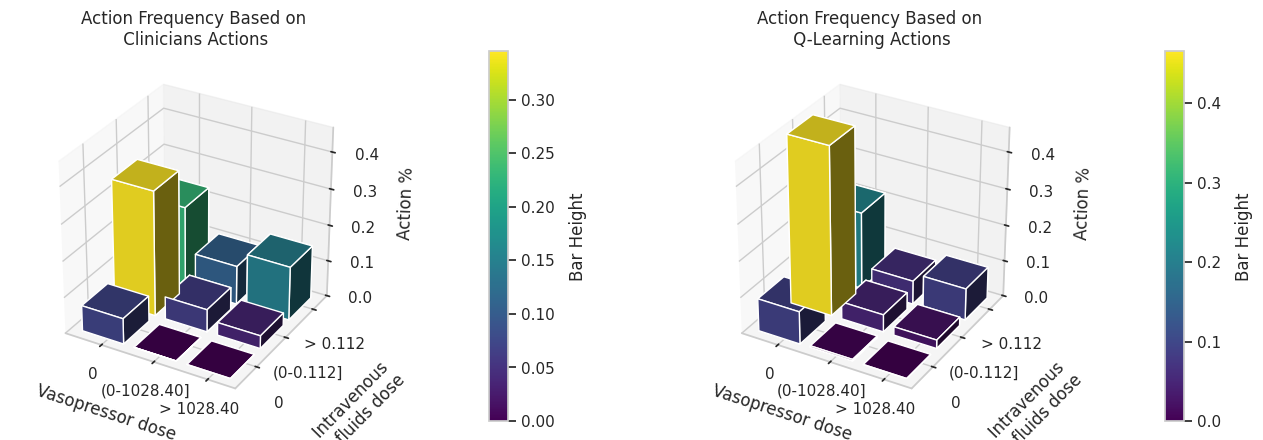

In [48]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
# Append optimal actions from Q-table to trajectory data
output_data = trajectory_data.copy()
output_data['optimal_action'] = trajectory_data['state'].apply(lambda s: np.argmax(agent.q_table[s]))


# 3D Bar Plot for Action Frequency Based on Actions Column
action_counts = np.bincount(output_data['action'], minlength=9)
action_counts = action_counts / sum(action_counts)
optimal_action_counts = np.bincount(output_data['optimal_action'], minlength=9)
optimal_action_counts = optimal_action_counts / sum(optimal_action_counts)
print(action_counts)
z_bar_height = max(optimal_action_counts.max(), action_counts.max())

# fuild * 3 + vaso
# Prepare a 3x3 grid for actions

action_grid_x, action_grid_y = np.meshgrid(range(3), range(3))
action_grid_z = action_counts.reshape(3, 3)
optimal_action_grid_z = optimal_action_counts.reshape(3, 3)
print(action_grid_z)

# Create the 3D bar plot
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

xpos = action_grid_x.ravel()
ypos = action_grid_y.ravel()
zpos = np.zeros_like(xpos)



for ax, bar_heights, title in [
    (ax1, action_grid_z, 'Action Frequency Based on\n Clinicians Actions'),
    (ax2, optimal_action_grid_z, 'Action Frequency Based on\n Q-Learning Actions')
]:
    dx = dy = 0.8  # Width of the bars
    dz = bar_heights.flatten()  # Heights of the bars

    # Normalize the bar heights (dz) for the colormap
    norm = mcolors.Normalize(vmin=dz.min(), vmax=dz.max())
    cmap = cm.viridis  # Choose a colormap

    # Map the bar heights (dz) to colors
    colors = cmap(norm(dz))

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True,  color=colors, edgecolor='white')
    #ax.view_init(elev=30, roll=0)
    ax.set_box_aspect(aspect=(1,1,1), zoom=0.9)
    ax.set_xlabel('Vasopressor dose        ', labelpad=10)
    ax.set_ylabel('       Intravenous\n          fluids dose', labelpad=30)
    ax.set_xticks([0.5, 1.5, 2.5], state_mapping["vasopressor"])
    ax.tick_params(axis='y', pad=10)  # Add padding for x-axis
    ax.set_yticks([0.5, 1.5, 2.5], state_mapping["fluid"])

    ax.set_zlabel('Action %', labelpad=20)
    ax.tick_params(axis='z', pad=10)  # Add padding for x-axis
    ax.set_zlim(0, z_bar_height)  # Replace max_height with your desired maximum height

    ax.set_title(title)

    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Required for colorbar
    cbar = plt.colorbar(sm, ax=ax, shrink=0.4, pad=0.2)  # Adjust size and position
    cbar.set_label('Bar Height', labelpad=10)


ax.dist = 20
plt.show()


In [49]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.3 MB/s eta 0:00:00


In [51]:
import torch
from torch.utils.data import DataLoader
from src.dkm import DKNLoss, Autoencoder
from src.dataset import AmsICUSepticShock


import optuna
import torch
from torch.utils.data import DataLoader

def load_and_evaluate_models_from_optuna(
    study_name,
    storage_url,
    input_dim,
    model_class,
    validation_data,
    criterion,
    model_weight_prefix="./MLRFH/models/",
    batch_size=64
):
    """
    Load and evaluate all models saved from an Optuna study and return the best model.

    Args:
        study_name (str): Name of the Optuna study.
        storage_url (str): URL to the Optuna storage (e.g., "sqlite:///optuna_study.db").
        input_dim (int): Input dimension of the Autoencoder.
        model_class (class): The Autoencoder class to initialize models.
        validation_data (torch.utils.data.Dataset): Validation dataset.
        criterion (torch.nn.Module): Loss function for evaluation.
        model_weight_prefix (str): Path prefix for the saved model weights.
        batch_size (int): Batch size for evaluation.

    Returns:
        tuple: (best_model, best_params, best_loss)
    """
    # Load the Optuna study
    study = optuna.load_study(study_name=study_name, storage=storage_url)
    print(study)

    # DataLoader for validation data
    validation_loader = DataLoader(validation_data, batch_size=batch_size, shuffle=False)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device {device} for evaluation.")

    best_model = None
    best_params = None
    best_loss = float("inf")

    for trial in study.trials:
        # Get trial parameters
        params = trial.params
        latent_dim = params["latent_dim"]
        layer_sizes = params["layer_sizes"]
        trial_number = trial.number

        print(f"Evaluating model from trial {trial_number} with parameters: {params}")

        # Initialize the model
        model = model_class(input_dim, latent_dim=latent_dim, layer_sizes=layer_sizes, k=400)
        model = model.to(device)

        # Load model weights
        model_path = f"{model_weight_prefix}dkm_model_{trial_number}.pth"
        try:
            state_dict = torch.load(model_path, map_location=torch.device('cpu'))
            #print(state_dict["cluster_centers"])
            model.load_state_dict(state_dict)
        except FileNotFoundError:
            print(f"Model weights not found for trial {trial_number} at {model_path}. Skipping...")
            continue
        #except RuntimeError:
        #    print(f"Error loading model weights for trial {trial_number}. Skipping...")
        #    continue

        model.eval()  # Set the model to evaluation mode

        # Evaluate the model on validation data
        total_loss = 0.0
        with torch.no_grad():
            for batch in validation_loader:
                x = batch.to(device)
                a_x, h_x = model(x)  # Forward pass

                # Compute loss
                loss = criterion(x, h_x, a_x, model.cluster_centers)  # Pass cluster centers as None if not used
                total_loss += loss.item() * x.size(0)

        avg_loss = total_loss / len(validation_loader.dataset)
        print(f"Validation Loss for trial {trial_number}: {avg_loss}")

        # Update the best model if this one is better
        if avg_loss < best_loss:
            best_loss = avg_loss
            best_model = model
            best_params = params

    print(f"Best Model: Trial {trial_number} with Loss: {best_loss}")
    return best_model, best_params, best_loss


study_name = "deep_kmeans_autoencoder"
storage_url = "sqlite:///optuna_study_final.db"
input_dim = len(df_val.columns)  # Adjust as per your data

# Validation dataset and criterion
validation_data = AmsICUSepticShock(df_val)
criterion = DKNLoss()

# Load and evaluate models
best_model, best_params, best_loss = load_and_evaluate_models_from_optuna(
    study_name=study_name,
    storage_url=storage_url,
    input_dim=input_dim,
    model_class=Autoencoder,
    validation_data=validation_data,
    criterion=criterion
)

print("Best model parameters:", best_params)
print("Best validation loss:", best_loss)


Using device cpu for evaluation.
Evaluating model from trial 0 with parameters: {'latent_dim': 32, 'layer_sizes': [128, 64, 32], 'lr': 0.00033452087005576207, 'batch_size': 128}
Model weights not found for trial 0 at ./MLRFH/models/dkm_model_0.pth. Skipping...
Evaluating model from trial 1 with parameters: {'latent_dim': 32, 'layer_sizes': [64, 32, 16], 'lr': 0.00020011872476609856, 'batch_size': 64}
Model weights not found for trial 1 at ./MLRFH/models/dkm_model_1.pth. Skipping...
Evaluating model from trial 2 with parameters: {'latent_dim': 8, 'layer_sizes': [32, 16, 10], 'lr': 0.0007707076083591185, 'batch_size': 256}
Model weights not found for trial 2 at ./MLRFH/models/dkm_model_2.pth. Skipping...
Evaluating model from trial 3 with parameters: {'latent_dim': 16, 'layer_sizes': [128, 64, 32], 'lr': 0.00673604967301358, 'batch_size': 128}
Model weights not found for trial 3 at ./MLRFH/models/dkm_model_3.pth. Skipping...
Evaluating model from trial 4 with parameters: {'latent_dim': 3

/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [64, 32, 16] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [32, 16, 10] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [128, 64, 32] which is of type list.
  warnings.warn(message)
<ipython-input-51-f9bf4c15d3ca>:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is p

Validation Loss for trial 4: 0.47292927257689693
Best Model: Trial 4 with Loss: 0.47292927257689693
Best model parameters: {'latent_dim': 32, 'layer_sizes': [32, 16, 10], 'lr': 0.0007062611566979547, 'batch_size': 64}
Best validation loss: 0.47292927257689693


In [52]:
use_features = ['Alanine aminotransferase', 'Albumin', 'Aspartate aminotransferase',
       'Base excess', 'Bilirubin.total', 'Calcium',
       'Calcium.ionized', 'Chloride', 'Creatinine', 'Diastolic blood pressure',
       'FiO2', 'Glucose', 'Heart Rate', 'Hemoglobin', 'INR', 'Lactate',
       'Leukocytes', 'Magnesium', 'Mean Blood Pressure', 'PT', 'PaOxygen',
       'Platelets', 'Potassium', 'Respiratory rate', 'Sodium', 'SpO2',
       'Systolic Blood Pressure', 'Temperature', 'Urea', 'Urine', 'Weight',
       'aPTT', 'pH Blood', 'paCO2', 'sofa_cns_score', 'ventilatory_support',
       'pao2_fio2_ratio', 'pao2', 'Gender', 'age_at_visit']

In [53]:
import torch
import numpy as np

import optuna
import torch
import numpy as np

def load_model_and_assign_states_from_study(
    study_name,
    storage_url,
    trial_index,
    model_class,
    data,
    device=None,
    model_weight_prefix="./MLRFH/models/"
):
    """
    Load a specific model using its trial index from an Optuna study, embed the data, and assign each datapoint to a cluster state.

    Args:
        study_name (str): Name of the Optuna study.
        storage_url (str): URL to the Optuna storage (e.g., "sqlite:///optuna_study.db").
        trial_index (int): Index of the trial to load.
        model_class (class): The Autoencoder class to initialize models.
        data (torch.Tensor): Dataset to embed and assign states (shape: [num_samples, input_dim]).
        device (torch.device, optional): Device to run the model on. Defaults to CPU if not provided.
        model_weight_prefix (str): Path prefix for the saved model weights.

    Returns:
        tuple: (embedded_data, assigned_states)
               - embedded_data (np.ndarray): The latent embeddings of the data.
               - assigned_states (np.ndarray): The cluster index for each data point.
    """
    if device is None:
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    # Load the Optuna study
    study = optuna.load_study(study_name=study_name, storage=storage_url)

    # Retrieve the trial based on the index
    trial = next((t for t in study.trials if t.number == trial_index), None)
    if trial is None:
        raise ValueError(f"Trial with index {trial_index} not found in the study.")

    # Get trial parameters
    params = trial.params
    latent_dim = params["latent_dim"]
    layer_sizes = params["layer_sizes"]

    print(f"Loading model for trial {trial_index} with parameters: {params}")

    # Initialize the model
    model = model_class(
        input_dim=data.size(1),  # Assuming data is a tensor with shape [num_samples, input_dim]
        latent_dim=latent_dim,
        layer_sizes=layer_sizes,
        k=400  # You can adjust this if the value is stored elsewhere
    )
    model = model.to(device)

    # Load model weights
    model_path = f"{model_weight_prefix}dkm_model_{trial_index}.pth"
    try:
        state_dict = torch.load(model_path, map_location=device)
        model.load_state_dict(state_dict)
    except FileNotFoundError:
        raise FileNotFoundError(f"Model weights not found for trial {trial_index} at {model_path}.")

    model.eval()

    # Extract cluster centers
    cluster_centers = model.cluster_centers.to(device)

    # Embed the data
    print("Embedding data...")
    data = data.to(device)
    with torch.no_grad():
        _, latent_representations = model(data)  # Assuming model returns (reconstructed, latent)
        embedded_data = latent_representations.cpu().numpy()

    # Assign each data point to the nearest cluster center
    print("Assigning states...")
    with torch.no_grad():
        distances = torch.cdist(latent_representations, cluster_centers, p=2)  # Pairwise distances
        assigned_states = torch.argmin(distances, dim=1).cpu().numpy()

    return embedded_data, assigned_states, model.cluster_centers.detach().numpy()


study_name = "deep_kmeans_autoencoder"
storage_url = "sqlite:///optuna_study_final.db"
trial_index = 4  # Example trial index
num_clusters = 400

# Load and use the model
embedded_data_train, assigned_states_train, cluster_centers = load_model_and_assign_states_from_study(
    study_name=study_name,
    storage_url=storage_url,
    trial_index=trial_index,
    model_class=Autoencoder,
    data=torch.Tensor(df_train[use_features].values)
)


# Print results
print("Latent Embeddings:")
print(embedded_data_train)
print("Assigned States:")
print(len(np.unique(assigned_states_train)))

embedded_data_test, assigned_states_test, _ = load_model_and_assign_states_from_study(
    study_name=study_name,
    storage_url=storage_url,
    trial_index=trial_index,
    model_class=Autoencoder,
    data=torch.Tensor(df_test[use_features].values)
)


# Print results
print("Latent Embeddings:")
print(embedded_data_test)
print("Assigned States:")
print(len(np.unique(assigned_states_test)))


Loading model for trial 4 with parameters: {'latent_dim': 32, 'layer_sizes': [32, 16, 10], 'lr': 0.0007062611566979547, 'batch_size': 64}
Embedding data...
Assigning states...


/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [64, 32, 16] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [32, 16, 10] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [128, 64, 32] which is of type list.
  warnings.warn(message)
<ipython-input-53-3a7900fcf614>:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is p

Latent Embeddings:
[[0.44982922 0.44503176 0.3665194  ... 0.3510201  0.34710446 0.39631873]
 [0.46925715 0.38900542 0.35933656 ... 0.34060383 0.365557   0.39109808]
 [0.46640033 0.38637713 0.36055583 ... 0.3393429  0.3639839  0.3931102 ]
 ...
 [0.44279853 0.4499578  0.37563396 ... 0.36015642 0.35196695 0.40380657]
 [0.44384718 0.45155224 0.37411708 ... 0.36128378 0.3499057  0.40258873]
 [0.428621   0.4518204  0.3778013  ... 0.36113453 0.33186522 0.41067606]]
Assigned States:
272
Loading model for trial 4 with parameters: {'latent_dim': 32, 'layer_sizes': [32, 16, 10], 'lr': 0.0007062611566979547, 'batch_size': 64}
Embedding data...
Assigning states...
Latent Embeddings:
[[0.4352359  0.44773132 0.36181462 ... 0.3457154  0.3177205  0.40019357]
 [0.45027173 0.41812566 0.3670131  ... 0.34802252 0.34635612 0.3992082 ]
 [0.44003686 0.41422856 0.37067336 ... 0.34792024 0.3383796  0.4060195 ]
 ...
 [0.44454262 0.45271456 0.37137914 ... 0.35638756 0.34941074 0.40074772]
 [0.461184   0.43247592 

/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [64, 32, 16] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [32, 16, 10] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [128, 64, 32] which is of type list.
  warnings.warn(message)
<ipython-input-53-3a7900fcf614>:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is p

In [54]:
import numpy as np

def assign_to_closest_center(embedded_data, cluster_centers):
    """
    Assign each data point in embedded_data to the closest cluster center.

    Parameters:
        embedded_data (numpy.ndarray): Array of shape (n_samples, n_features) representing the embedded data points.
        cluster_centers (numpy.ndarray): Array of shape (n_clusters, n_features) representing the cluster centers.

    Returns:
        numpy.ndarray: Array of shape (n_samples,) containing the index of the closest cluster center for each data point.
    """
    # Compute the distances between each data point and each cluster center
    distances = np.linalg.norm(embedded_data[:, np.newaxis] - cluster_centers, axis=2)

    # Find the index of the closest cluster center for each data point
    assigned_states = np.argmin(distances, axis=1)

    return assigned_states



# Assign each point to the closest cluster center
assigned_states_train = assign_to_closest_center(embedded_data_train, cluster_centers)
assigned_states_test = assign_to_closest_center(embedded_data_test, cluster_centers)
print("Assigned cluster indices:", assigned_states_train)

Assigned cluster indices: [292 394 394 ... 140 140  29]


<ipython-input-55-dc51cb98063d>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap("tab10", unique_clusters)


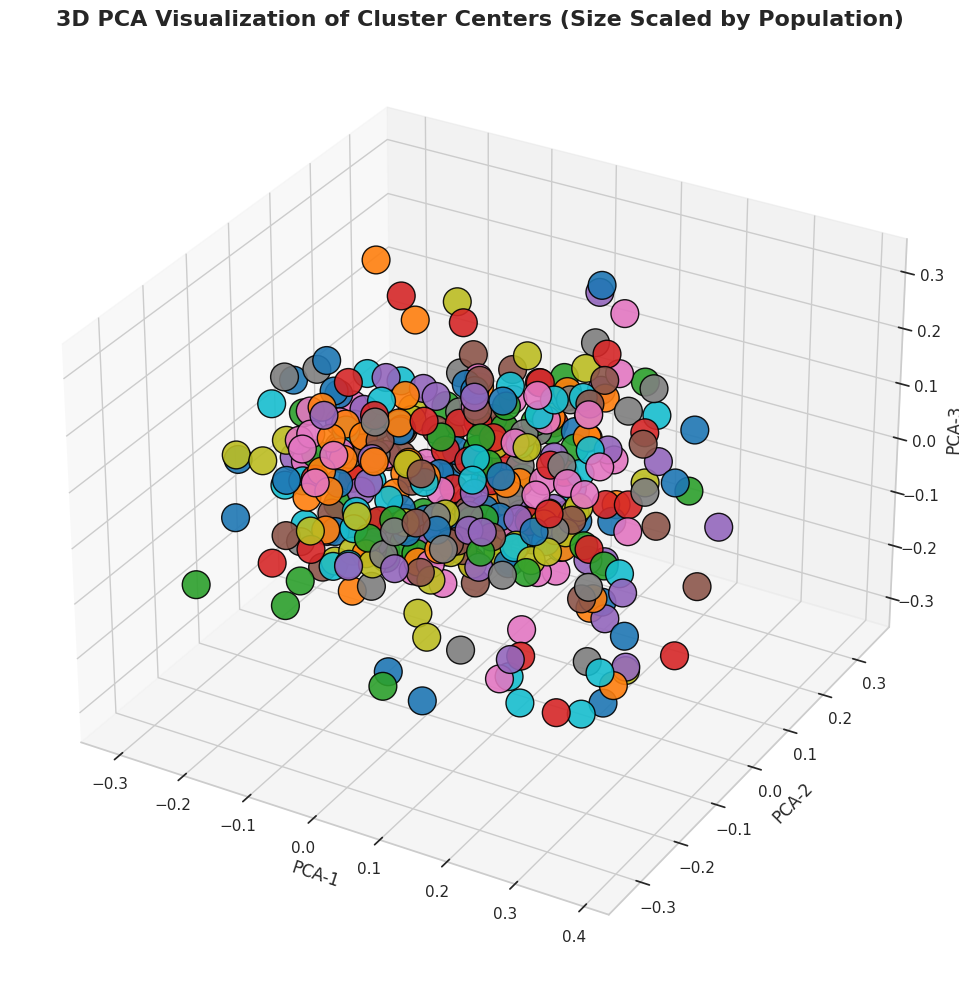

In [55]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data (replace with your clustered data)
data = df_test_clust.copy().values  # Replace with your data
cluster_labels = df_test["state"].values  # Replace with your cluster labels

# Calculate cluster centers and sizes
unique_clusters = len(cluster_centers)
#cluster_centers =
cluster_sizes = np.ones(shape=cluster_centers.shape[0])  # Cluster population

# Apply PCA to reduce cluster centers to 3D
pca = PCA(n_components=3)
pca_results = pca.fit_transform(cluster_centers)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(pca_results, columns=["PCA-1", "PCA-2", "PCA-3"])
pca_df["Cluster"] = unique_clusters
pca_df["Size"] = cluster_sizes

# Generate a color palette for distinct colors
color_palette = plt.cm.get_cmap("tab10", unique_clusters)
colors = [color_palette(cluster) for cluster in range(unique_clusters)]

# Normalize cluster sizes for plotting
marker_sizes = (pca_df["Size"] / pca_df["Size"].max()) * 300 + 100  # Scale marker sizes

# 3D Plot using Matplotlib
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for cluster centers
scatter = ax.scatter(
    pca_df["PCA-1"], pca_df["PCA-2"], pca_df["PCA-3"],
    c=colors, s=marker_sizes, alpha=0.9, edgecolor="black"
)

# Add labels and title
ax.set_title("3D PCA Visualization of Cluster Centers (Size Scaled by Population)", fontsize=16, fontweight="bold")
ax.set_xlabel("PCA-1", fontsize=12)
ax.set_ylabel("PCA-2", fontsize=12)
ax.set_zlabel("PCA-3", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [56]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

def compute_similarity_scores(labels1, labels2):
    """
    Compute similarity scores between two clusterings.

    Parameters:
        labels1 (list or array): Cluster labels of the first clustering.
        labels2 (list or array): Cluster labels of the second clustering.

    Returns:
        dict: A dictionary containing NMI, ARI, and V-Measure scores.
    """
    scores = {
        'NMI': normalized_mutual_info_score(labels1, labels2),
        'ARI': adjusted_rand_score(labels1, labels2),
    }
    return scores

# Example usage
if __name__ == "__main__":
    # Example cluster labels
    clustering1 = assigned_states_train
    clustering2 = df_train["state"].values

    similarity_scores = compute_similarity_scores(clustering1, clustering2)

    print("Similarity Scores:")
    for metric, score in similarity_scores.items():
        print(f"{metric}: {score:.3f}")

Similarity Scores:
NMI: 0.458
ARI: 0.052


In [57]:
import pandas as pd

# Example DataFrame
df_train_emb_rl = df_test[['state','action','reward','seq_id','visit_occurrence_id']]
df_train_emb_rl['state'] = assigned_states_test
# Initialize an empty list to store trajectory data
trajectory_data_emb = []

# Group by 'id' to handle each trajectory independently
for _, group in df_train_emb_rl.groupby('visit_occurrence_id'):
    group = group.sort_values('seq_id')  # Ensure the sequence is sorted
    states = group['state'].tolist()
    actions = group['action'].tolist()
    rewards = group['reward'].tolist()

    # Create next_state by shifting 'state' column
    next_states = states[1:] + [-1]  # Last next_state is None

    # Create done flag (1 for the last step, 0 otherwise)
    done_flags = [0] * (len(states) - 1) + [1]

    # Build the trajectory data
    for i in range(len(states)):
        trajectory_data_emb.append({
            'state': states[i],
            'action': actions[i],
            'reward': rewards[i],
            'next_state': next_states[i],
            'done': done_flags[i]
        })

# Convert trajectory data to a DataFrame
trajectory_data_emb = pd.DataFrame(trajectory_data_emb)

# Display the result
print(trajectory_data_emb)
print(trajectory_data_emb.dtypes)

<ipython-input-57-ea055e181a60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_emb_rl['state'] = assigned_states_test


      state  action  reward  next_state  done
0       353       0       0         372     0
1       372       8       0         213     0
2       213       8       0         365     0
3       365       8       0         213     0
4       213       8       0         213     0
...     ...     ...     ...         ...   ...
8913    292       6       0         143     0
8914    143       3     100          -1     1
8915    140       0       0         164     0
8916    164       7       0         353     0
8917    353       3     100          -1     1

[8918 rows x 5 columns]
state         int64
action        int64
reward        int64
next_state    int64
done          int64
dtype: object


In [58]:
import numpy as np
import pandas as pd

class QLearningAgent:
    def __init__(self, state_space_size, action_space_size, learning_rate=0.1, discount_factor=0.99):
        """
        Initialize the Q-learning agent.

        Parameters:
        - state_space_size: Number of states (discretized features).
        - action_space_size: Number of discrete actions.
        - learning_rate: Step size for updating Q-values.
        - discount_factor: Discount factor for future rewards.
        """
        self.state_space_size = state_space_size
        self.action_space_size = action_space_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.q_table = np.zeros((state_space_size, action_space_size), dtype=np.float64)  # Initialize Q-table

    def update_batch(self, states, actions, rewards, next_states):
        """
        Update the Q-table using a batch of transitions, considering terminal states represented as -1.

        Parameters:
        - states: Array of current states.
        - actions: Array of actions taken.
        - rewards: Array of observed rewards.
        - next_states: Array of resulting next states, with -1 for terminal states.
        """
        td_targets = rewards.copy()

        # Mask for non-terminal states
        non_terminal_mask = next_states != -1

        # For non-terminal states, include the discounted future rewards
        if np.any(non_terminal_mask):
            next_states_non_terminal = next_states[non_terminal_mask].astype(int)  # Convert valid states to int
            best_next_actions = np.argmax(self.q_table[next_states_non_terminal], axis=1)
            td_targets[non_terminal_mask] += (
                self.discount_factor * self.q_table[next_states_non_terminal, best_next_actions]
            )

        # Ensure td_targets dtype matches q_table dtype
        td_targets = td_targets.astype(self.q_table.dtype)

        # Update Q-values
        for i in range(len(states)):
            td_error = td_targets[i] - self.q_table[states[i], actions[i]]
            self.q_table[states[i], actions[i]] += self.learning_rate * td_error

# Define state and action space sizes
state_space_size = trajectory_data_emb['state'].max() + 1
action_space_size = trajectory_data_emb['action'].max() + 1

# Initialize Q-learning agent
agent_emb = QLearningAgent(state_space_size, action_space_size)

# Training with batch processing
batch_size = 2
for i in range(0, len(trajectory_data_emb), batch_size):
    # Extract batch
    batch = trajectory_data_emb.iloc[i:i + batch_size]
    states = batch['state'].values
    actions = batch['action'].values
    rewards = batch['reward'].astype(float).values
    next_states = batch['next_state'].values

    # Update Q-table using the batch
    agent_emb.update_batch(states, actions, rewards, next_states)

# Print the trained Q-table
print("Trained Q-Table:")
print(agent_emb.q_table)


Trained Q-Table:
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 1.30570862  0.          0.         ... 10.17649294  5.66333174
   4.66608711]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.83859464  0.          0.         ... -5.10719624 -6.06267898
  -6.74642187]
 [ 0.08890548  0.          0.         ...  1.55618209  1.2555855
   1.87465459]
 [ 2.28636345  0.          0.         ...  5.62738298  2.20816342
   3.59575807]]


[7.09800404e-02 1.12132765e-04 0.00000000e+00 3.45144651e-01
 6.24579502e-02 3.56582193e-02 2.30096434e-01 1.07086791e-01
 1.48463781e-01]
[[7.09800404e-02 1.12132765e-04 0.00000000e+00]
 [3.45144651e-01 6.24579502e-02 3.56582193e-02]
 [2.30096434e-01 1.07086791e-01 1.48463781e-01]]


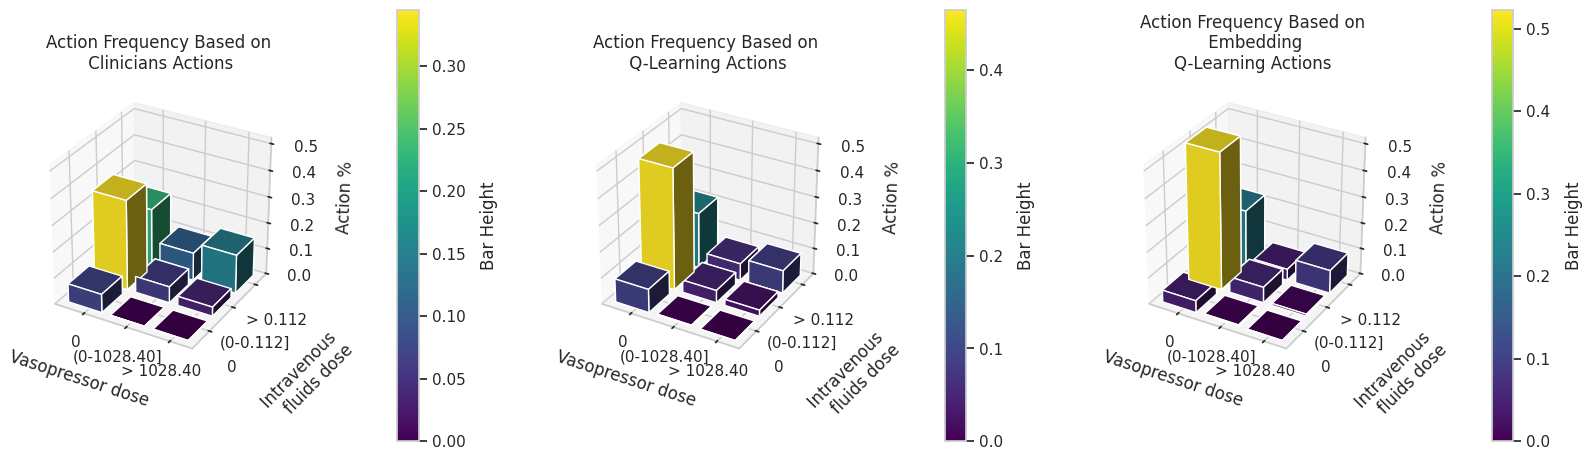

In [59]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
# Append optimal actions from Q-table to trajectory data
output_data = trajectory_data.copy()
output_data['optimal_action'] = trajectory_data['state'].apply(lambda s: np.argmax(agent.q_table[s]))
output_data['optimal_action_emb'] = trajectory_data_emb['state'].apply(lambda s: np.argmax(agent_emb.q_table[s]))


# 3D Bar Plot for Action Frequency Based on Actions Column
action_counts = np.bincount(output_data['action'], minlength=9)
action_counts = action_counts / sum(action_counts)

optimal_action_counts = np.bincount(output_data['optimal_action'], minlength=9)
optimal_action_counts = optimal_action_counts / sum(optimal_action_counts)

optimal_action_emb_counts = np.bincount(output_data['optimal_action_emb'], minlength=9)
optimal_action_emb_counts = optimal_action_emb_counts / sum(optimal_action_emb_counts)

print(action_counts)
z_bar_height = max(optimal_action_counts.max(), action_counts.max(), optimal_action_emb_counts.max())

# fuild * 3 + vaso
# Prepare a 3x3 grid for actions

action_grid_x, action_grid_y = np.meshgrid(range(3), range(3))
action_grid_z = action_counts.reshape(3, 3)
optimal_action_grid_z = optimal_action_counts.reshape(3, 3)
optimal_emb_action_grid_z = optimal_action_emb_counts.reshape(3, 3)
print(action_grid_z)

# Create the 3D bar plot
fig = plt.figure(figsize=(20, 14))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

xpos = action_grid_x.ravel()
ypos = action_grid_y.ravel()
zpos = np.zeros_like(xpos)



for ax, bar_heights, title in [
    (ax1, action_grid_z, 'Action Frequency Based on\n Clinicians Actions'),
    (ax2, optimal_action_grid_z, 'Action Frequency Based on\n Q-Learning Actions'),
    (ax3, optimal_emb_action_grid_z, 'Action Frequency Based on\n Embedding\nQ-Learning Actions')
]:
    dx = dy = 0.8  # Width of the bars
    dz = bar_heights.flatten()  # Heights of the bars

    # Normalize the bar heights (dz) for the colormap
    norm = mcolors.Normalize(vmin=dz.min(), vmax=dz.max())
    cmap = cm.viridis  # Choose a colormap

    # Map the bar heights (dz) to colors
    colors = cmap(norm(dz))

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True,  color=colors, edgecolor='white')
    #ax.view_init(elev=30, roll=0)
    ax.set_box_aspect(aspect=(1,1,1), zoom=0.9)
    ax.set_xlabel('Vasopressor dose        ', labelpad=10)
    ax.set_ylabel('       Intravenous\n          fluids dose', labelpad=30)
    ax.set_xticks([0.5, 1.5, 2.5], state_mapping["vasopressor"])
    ax.tick_params(axis='y', pad=10)  # Add padding for x-axis
    ax.set_yticks([0.5, 1.5, 2.5], state_mapping["fluid"])

    ax.set_zlabel('Action %', labelpad=20)
    ax.tick_params(axis='z', pad=10)  # Add padding for x-axis
    ax.set_zlim(0, z_bar_height)  # Replace max_height with your desired maximum height

    ax.set_title(title)

    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Required for colorbar
    cbar = plt.colorbar(sm, ax=ax, shrink=0.4, pad=0.2)  # Adjust size and position
    cbar.set_label('Bar Height', labelpad=10)


ax.dist = 20
plt.show()


In [60]:

# Calculate transition probabilities
transition_counts = trajectory_data.groupby(["state", "action", "next_state"]).size().reset_index(name="count")
state_action_counts = trajectory_data.groupby(["state", "action"]).size().reset_index(name="total_count")
transition_probs = pd.merge(transition_counts, state_action_counts, on=["state", "action"])
transition_probs["probability"] = transition_probs["count"] / transition_probs["total_count"]

# Calculate rewards
reward_means = trajectory_data.groupby(["state", "action"])["reward"].mean().reset_index(name="expected_reward")

# Combine transition probabilities and rewards
empirical_mdp = pd.merge(transition_probs, reward_means, on=["state", "action"])


# Clinician Policy

In [61]:
# Count how many times each action was taken for each state
state_action_counts = trajectory_data.groupby(["state", "action"]).size().reset_index(name="count")

# Count total number of actions for each state
total_state_actions = trajectory_data.groupby("state")["action"].size().reset_index(name="total_count")

# Merge counts and calculate probabilities
clinician_policy_df = pd.merge(state_action_counts, total_state_actions, on="state")
clinician_policy_df["probability"] = clinician_policy_df["count"] / clinician_policy_df["total_count"]


In [76]:
clinician_policy_df.shape

(1646, 5)

In [75]:
agent.q_table.shape

(400, 9)

# Evaluation

In [62]:
# Extract learned policy from Q-table
learned_policy = np.argmax(agent.q_table, axis=1)

learned_policy_emb = np.argmax(agent_emb.q_table, axis=1)

In [63]:
def simulate_policy(policy, mdp, num_trajectories=100, max_steps=100):
    total_rewards = []

    for _ in range(num_trajectories):
        state = np.random.choice(mdp['state'].unique())  # Start from a random initial state
        state = int(state)  # Ensure state is an integer
        cumulative_reward = 0
        steps = 0
        done = False

        while not done and steps < max_steps:
            # Select action based on the policy
            if isinstance(policy, np.ndarray):  # Learned policy
                if state < 0 or state >= len(policy):
                    break  # Handle out-of-bounds state
                action = policy[state]
            elif callable(policy):  # Callable policy (clinician)
                action = policy(state)

            # Get possible transitions
            transitions = mdp[(mdp['state'] == state) & (mdp['action'] == action)]

            if transitions.empty:
                break

            # Sample next state based on transition probabilities
            next_state = transitions.sample(weights='probability')['next_state'].values[0]
            reward = transitions['expected_reward'].values[0]

            cumulative_reward += reward
            state = int(next_state) if not pd.isna(next_state) else None  # Ensure valid integer or terminal state

            # Check if terminal
            done = next_state is None
            steps += 1

        total_rewards.append(cumulative_reward)

    return np.mean(total_rewards), np.std(total_rewards)


In [64]:
mean_reward, std_reward = simulate_policy(learned_policy, empirical_mdp)
print(f"Learned Policy: Mean Reward = {mean_reward}, Std Dev = {std_reward}")


Learned Policy: Mean Reward = 82.43912677384532, Std Dev = 73.52519596393458


In [65]:
mean_reward, std_reward = simulate_policy(learned_policy_emb, empirical_mdp)
print(f"Learned Policy: Mean Reward = {mean_reward}, Std Dev = {std_reward}")

Learned Policy: Mean Reward = 13.742915553700495, Std Dev = 27.85180843630588


In [ ]:
def clinician_policy(state):
    actions = clinician_policy_df[clinician_policy_df['state'] == state]
    return actions.sample(weights='probability')['action'].values[0]

mean_reward_clinician, std_reward_clinician = simulate_policy(clinician_policy, empirical_mdp)
print(f"Clinician Policy: Mean Reward = {mean_reward_clinician}, Std Dev = {std_reward_clinician}")


# Policy Alignment Matrix

<ipython-input-95-590066918c30>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.assign(prob=group["count"] / group["count"].sum()))
<ipython-input-95-590066918c30>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.loc[group["prob"].idxmax(), "action"])  # Most probable action


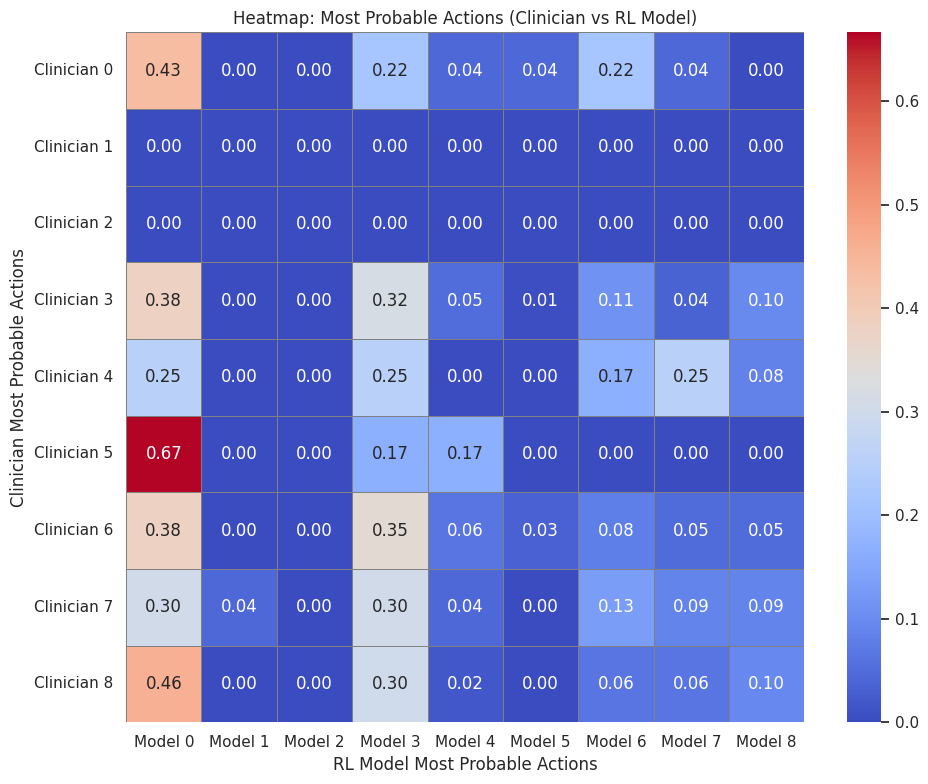

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have these variables:
# - clinician_actions: a list of actions (0-8) taken by clinicians for each state in the trajectory
# - model_actions: a list of actions (0-8) predicted by the RL model for the same states
# Ensure both are aligned (same length, matching states)

# Example dummy data for illustration (replace this with real data)
np.random.seed(42)
num_actions = 9
num_states = 400

clinician_action_probs = (
    clinician_policy_df.groupby("state")
    .apply(lambda group: group.assign(prob=group["count"] / group["count"].sum()))
    .reset_index(drop=True)
)

# Create a dictionary for fast lookup: {state: most_probable_action}
clinician_prob_dict = (
    clinician_action_probs.groupby("state")
    .apply(lambda group: group.loc[group["prob"].idxmax(), "action"])  # Most probable action
    .to_dict()
)
# Define a function to compute softmax probabilities from Q-values
def softmax(q_values, temperature=1.0):
    exp_q = np.exp(q_values / temperature)
    return exp_q / np.sum(exp_q)

# Create a 9x9 matrix for the heatmap
heatmap_matrix = np.zeros((num_actions, num_actions))

# Iterate over all states
# Iterate over all states
for state in range(num_states):
    # Most probable clinician action
    clinician_action = clinician_prob_dict.get(state, None)
    if clinician_action is None:  # Skip if clinician data for the state is missing
        continue

    # Most probable RL model action
    model_probs = softmax(agent_emb.q_table[state])  # Softmax-normalized probabilities
    model_action = np.argmax(model_probs)

    # Increment the heatmap cell for (clinician_action, model_action)
    heatmap_matrix[clinician_action, model_action] += 1

# Normalize the heatmap rows so each row sums to 1
row_sums = heatmap_matrix.sum(axis=1, keepdims=True)  # Row sums
normalized_heatmap_matrix = heatmap_matrix / np.maximum(row_sums, 1)  # Avoid division by zero

# Create a DataFrame for the normalized heatmap
heatmap_df = pd.DataFrame(
    normalized_heatmap_matrix,
    index=[f"Clinician {i}" for i in range(num_actions)],
    columns=[f"Model {i}" for i in range(num_actions)]
)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    linecolor="gray"
)
plt.title("Heatmap: Most Probable Actions (Clinician vs RL Model)")
plt.xlabel("RL Model Most Probable Actions")
plt.ylabel("Clinician Most Probable Actions")
plt.tight_layout()
plt.show()

